<h2><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTPskj1g-Ri8Bb5tiVKNaJtGjM4nKFZ84SaHM78R2amyGwL3Ok" alt="roundtoc" style="float:left;width:40px;height:40px;">   <b>Configuration Block</b><a class="anchor" id="H0"></a></h2>  

&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  

In [1]:
# ---------------------------------------------------------------------------------------------------------- #
#                                     <<<<[[[[  CONFIGURATION  ]]]]>>>>                                      #
# ---------------------------------------------------------------------------------------------------------- #

config = {
    'Paths': {
        'RAW_training_data_file': '/home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/data/inputs/training.1600000.processed.noemoticon.csv',
        'RAW_test_data_file': '/home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/data/inputs/testdata.manual.2009.06.14.csv',
        'cleaned_train_data_file': '/home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/data/inputs/cleaned_train_data.tsv',
        'cleaned_test_data_file': '/home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/data/inputs/cleaned_test_data.tsv',
    },
    'DataPreparation': {
        'All_Features': '''['sentiment_class','id','date','query_string','user','text']''', ## will be used to define/give names to the columns
        'FeatureToDrop': '''['id','date','query_string','user']''',
        'frac_in_sample_to_take': '0.025',
        'text_cleaning_steps' : '''['accented_char_removal', 'remove_attherate_mentions', 'remove_urls', 'html_stripping', 'contraction_expansion', 'text_lemmatization', 'special_char_removal', 'remove_digits', 'remove_whitespace_character', 'remove_extra_whitespaces', 'remove_commas_bw_digits', 'remove_extra_meaningless_newlines', 'text_lower_case']''',
        'temp': 'temp'
    }
    
    
    
#     'training_file_cleaned': 'CleanedTrainingData.csv',
#     'test_file_cleaned': 'CleanedTestData.csv',
#     'term_frequency_file': "TermFrequency.csv",
#     'Train:Val:TestSplit': '98:1:1'

#     'DimensionalityTransformationAlgo':['PCA', 'ICA'],

#     'bq_env': {'edit_query': 'Yes', 
#                'bq_query_template_file': 'QueryTemplateClustering.txt', 
#                'sid': ['1071'] ,
#                'date': ['010218'],
#                'MaxNoObsToGet': '1000000'},

#     'Trial':["ABC","DEF","GHI"],
}

# ---------------------------------------------------------------------------------------------------------- #

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;1. Importing the Libraries</b><a class="anchor" id="H1"></a></h2>

&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [2]:
from txt0_GeneralFunc import (levprint, print_system_info, generate_highlighted_heading, 
                              get_abs_path_from_relative_path, time_cataloging, 
                              create_key, add_recommendation)

from txt2_EDA_general import (plot_wordcloud, plot_chartext_informations, cnt_words,
                             zipf_law_plot, visualize_word_count_wrt_class)

print_system_info()

# of stopwords in each lib:  318 179 190
# of stopwords when aggregated: 414
+----------------------------------------------------------------------------------------------------------------
| Inside "print_system_info" function.
| Python Version: 3.6.7
| Machine Name: localmachine
| OS: Linux-4.15.0-51-generic-x86_64-with-Ubuntu-18.04-bionic
| Hardware: 	 CPU brand: Intel(R) Core(TM) i5-6200U CPU @ 2.30GHz
| 		 CPU # of cores: 4
| 		 RAM: Total = 7.68 GB, Available = 5.12 GB
| Current Working Directory: /home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/bin
+----------------------------------------------------------------------------------------------------------------


In [3]:
'''
Description: 
    This file provide some function that are for general use cases.
Function this file Contains:
    - levprint: It is used to print statement based on the level. i.e.  function level.
    - print_system_info: Used to print the system configurations
    - generate_highlighted_heading: Used to generate some comment based heading / seperators
Package Installation:
# !pip3 install seaborn
Reference Links:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
'''

# --------------------------------------------  Loading Libraries  --------------------------------------------- #
import time, os, glob, ast, re
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

# pd.set_option('display.height', 10000)
pd.set_option('display.max_colwidth', 180)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
plt.style.use('fivethirtyeight')
%matplotlib inline 
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'


# from wordcloud import WordCloud
from pylab import *
# pip3 install bokeh
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.models import HoverTool
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction import text

# start_time = time.time()
# print('Time taken {:.4f} s'.format(end_time - start_time))

# ---------------------------------------------------------------------------------------------------------- #

Loading BokehJS ...

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;2. Loading the Cleaned Data</b><a class="anchor" id="H2"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [4]:
train_DF = pd.read_csv(config['Paths']['cleaned_train_data_file'], sep='\t')
test_DF = pd.read_csv(config['Paths']['cleaned_test_data_file'], sep='\t')

print("Training Dataset Shape: ", train_DF.shape)
print("Test Dataset Shape: ", test_DF.shape)
display(train_DF.head())

Training Dataset Shape:  (39918, 2)
Test Dataset Shape:  (177, 2)


sentiment_class                                                                    text
0                0                     shady korean fellah do not call me once he get home
1                1                                hah do you enjoy my random fact on sleep
2                0                                              i really be go to miss you
3                0                         pasta be at work while rice be take a math test
4                0  wow atleast u only have three week i have two month to go be u go away

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;3. Understanding the Data</b><a class="anchor" id="H3"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;4. Data Preprocessing</b><a class="anchor" id="H4"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;5.  Data Exploration and Visualization</b><a class="anchor" id="H5"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;**Text Visualization** 
  
### 5.1. Word Cloud
A word cloud represents word usage in a document by resizing individual words proportionally to its frequency and then presenting them in a random arrangement.  
 

______________________________________________________________________________________________________________


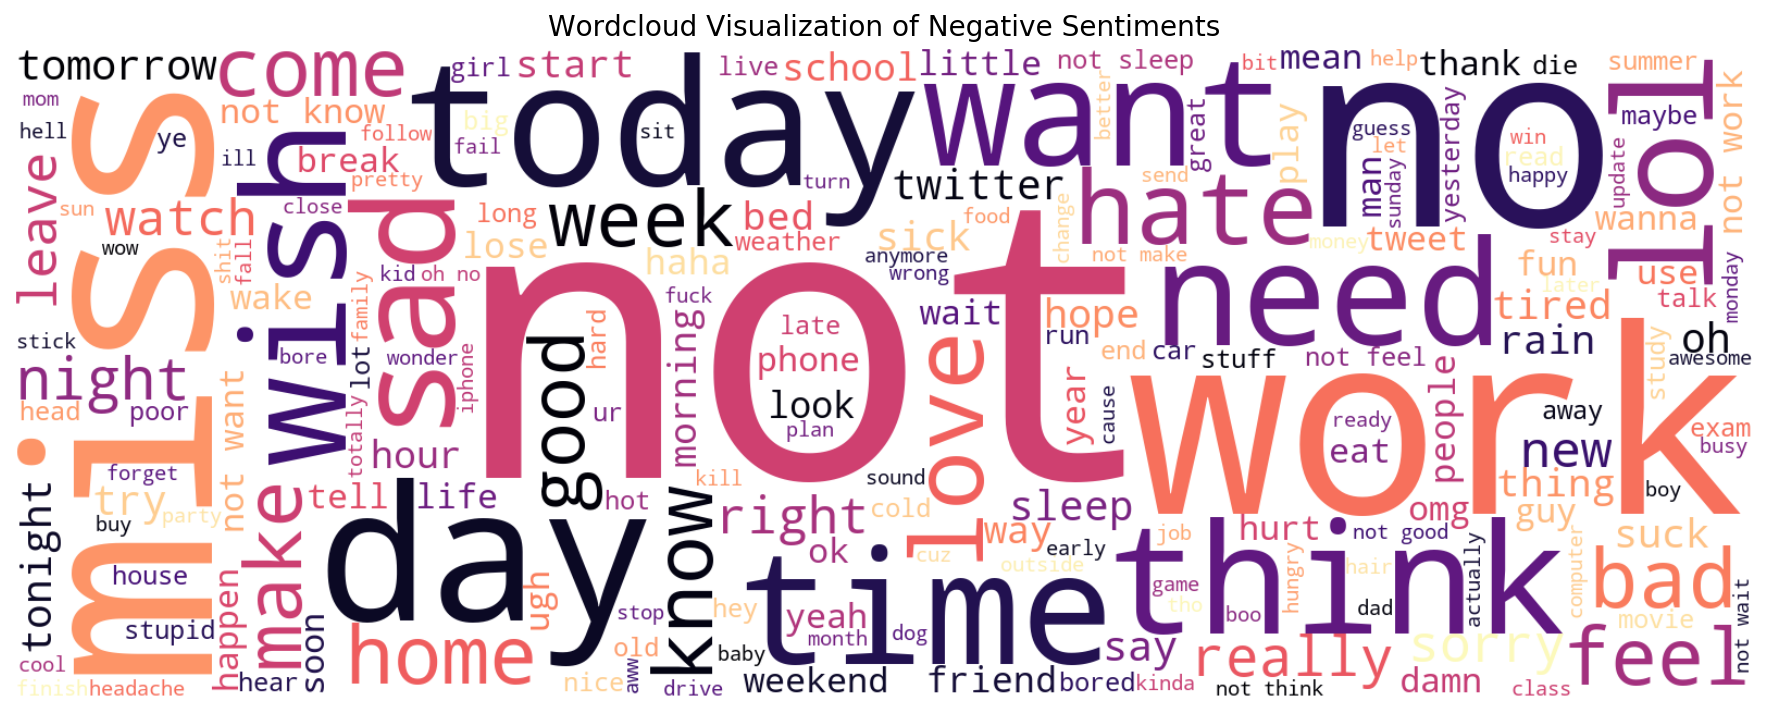

______________________________________________________________________________________________________________


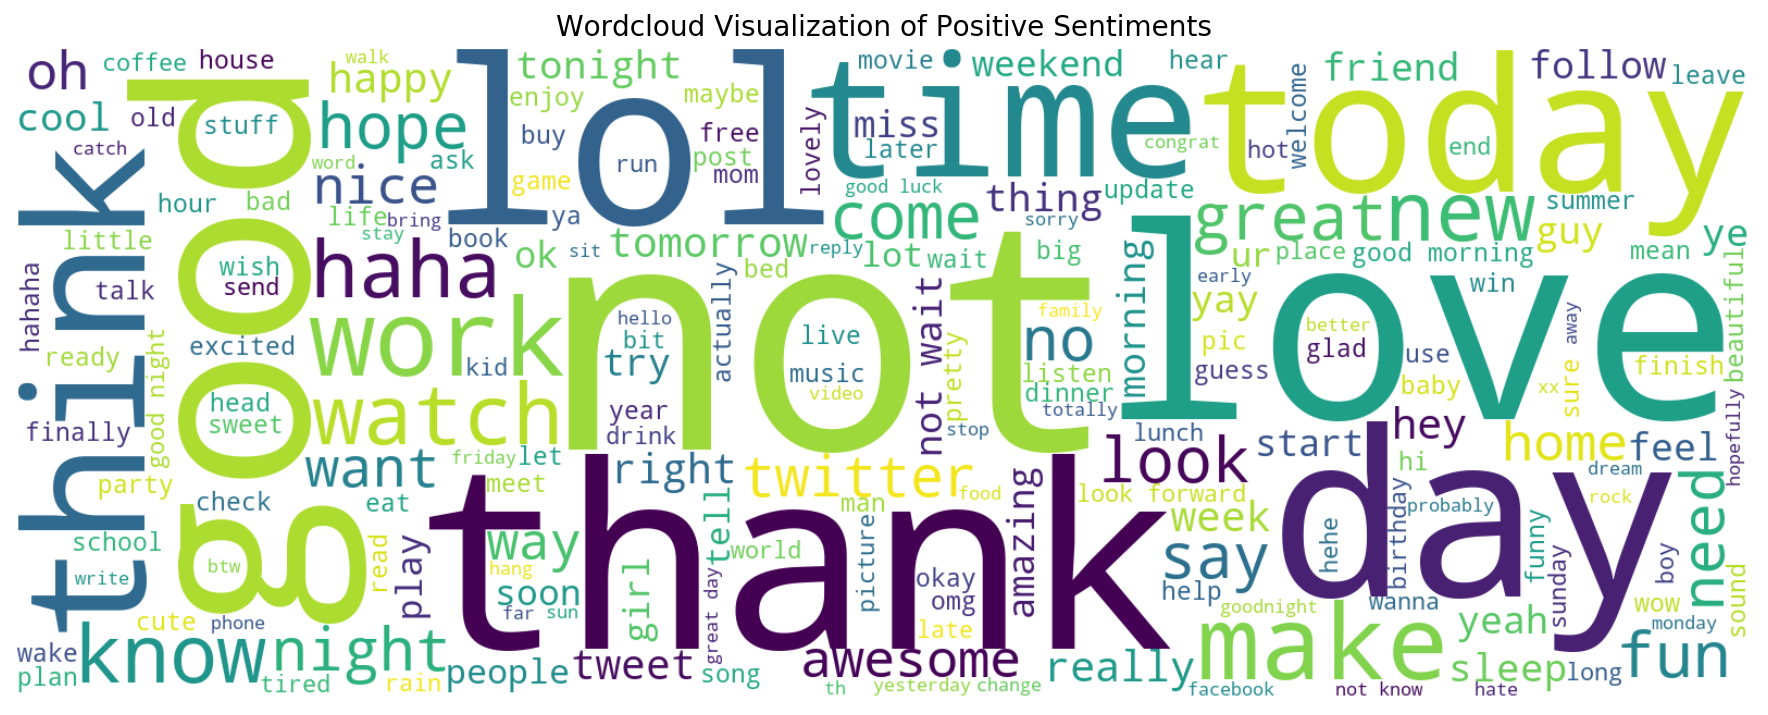

In [5]:


## Developing Wordcloud for NEGATIVE sentiments
string_list = train_DF['text'].loc[train_DF['sentiment_class'] == 0].tolist()
plot_wordcloud(string_list, title = 'Wordcloud Visualization of Negative Sentiments', remove_stopword=True, clr_map = 'magma', bg='white')

## Developing Wordcloud for POSITIVE sentiments
string_list = train_DF['text'].loc[train_DF['sentiment_class'] == 1].tolist()
plot_wordcloud(string_list, title = 'Wordcloud Visualization of Positive Sentiments', remove_stopword=True, bg='white')

In [6]:
# [text for text in string_list if 'love' in text][0:15]

## Cleaning the Workspace
# %whos
# del(string_list, SinglePooledString, wordcloud, WordCloud)

### Understanding CHaracter Level Information

Plotting : Number of characters in texts


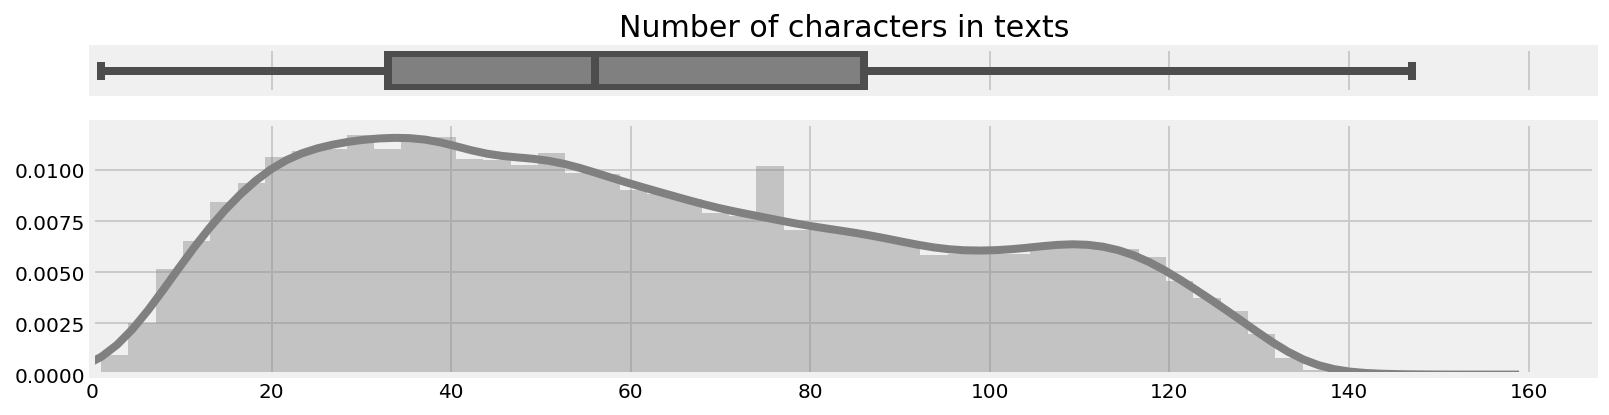

Plotting : Number of character that are in upper case
Exception: singular matrix


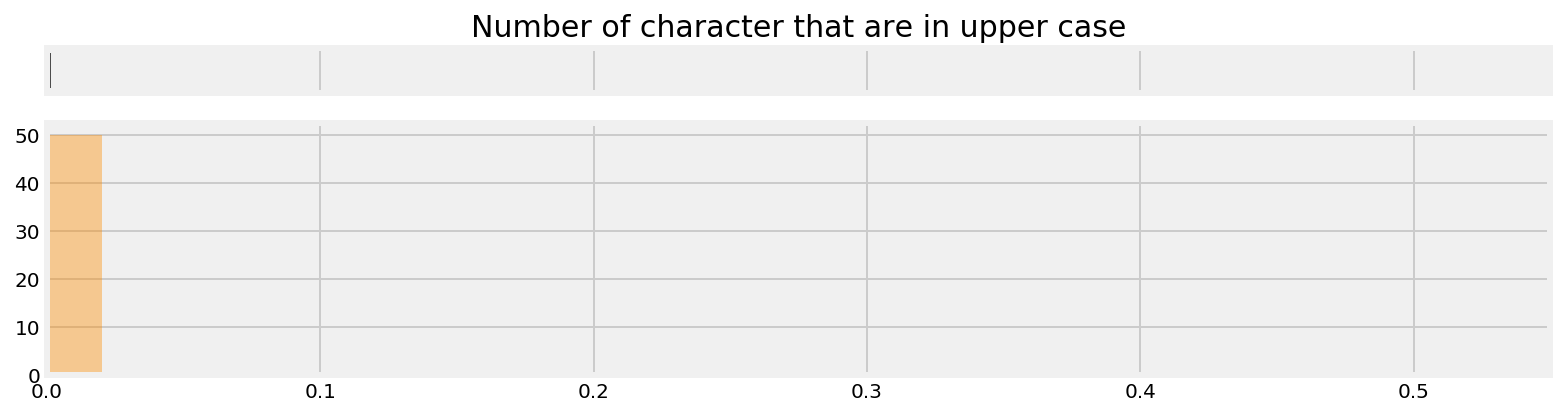

Plotting : Number of character that are in lower case


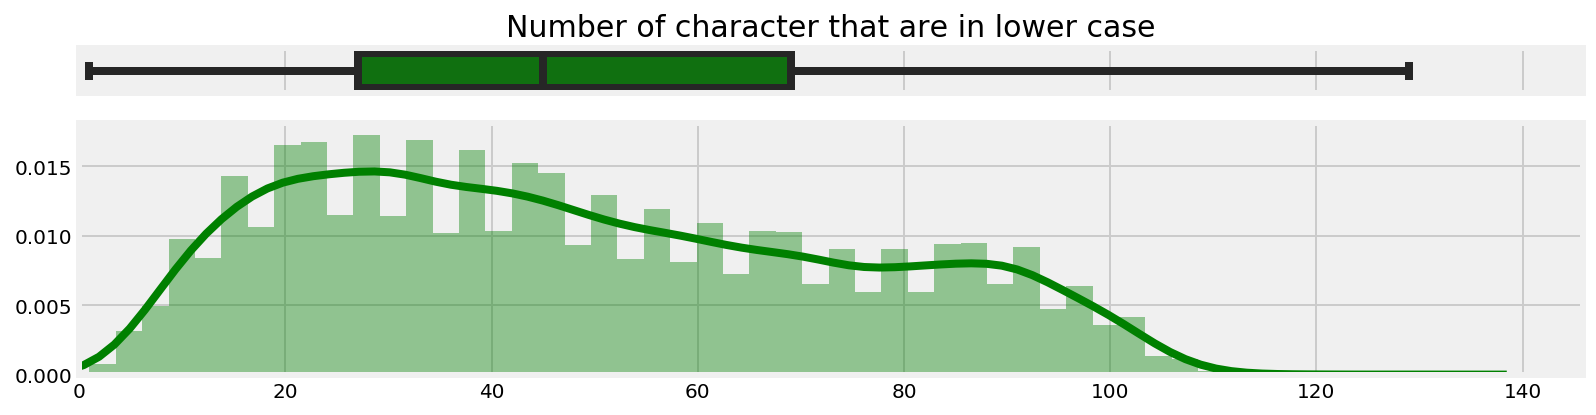

Plotting : Number of character that are Numeric
Exception: singular matrix


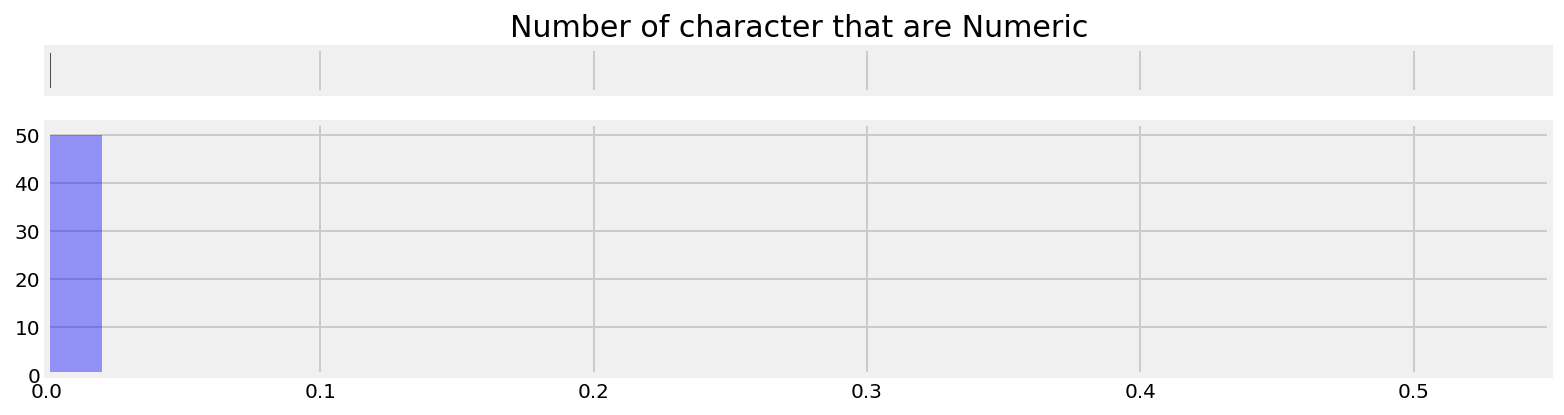

Plotting : Number of character that are Whitespaces


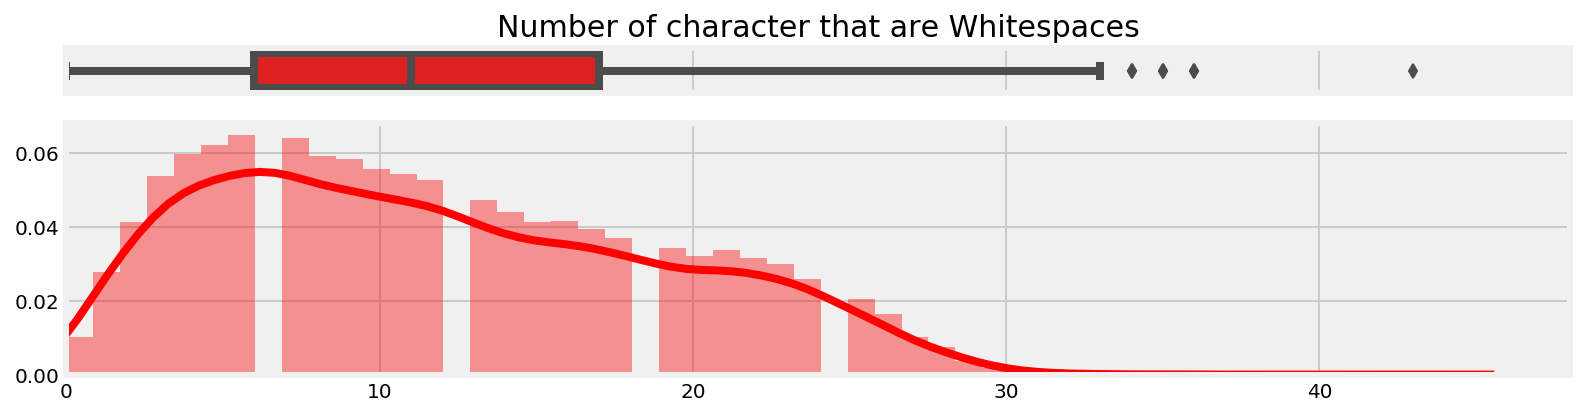

Plotting : Number of character that are Special Character


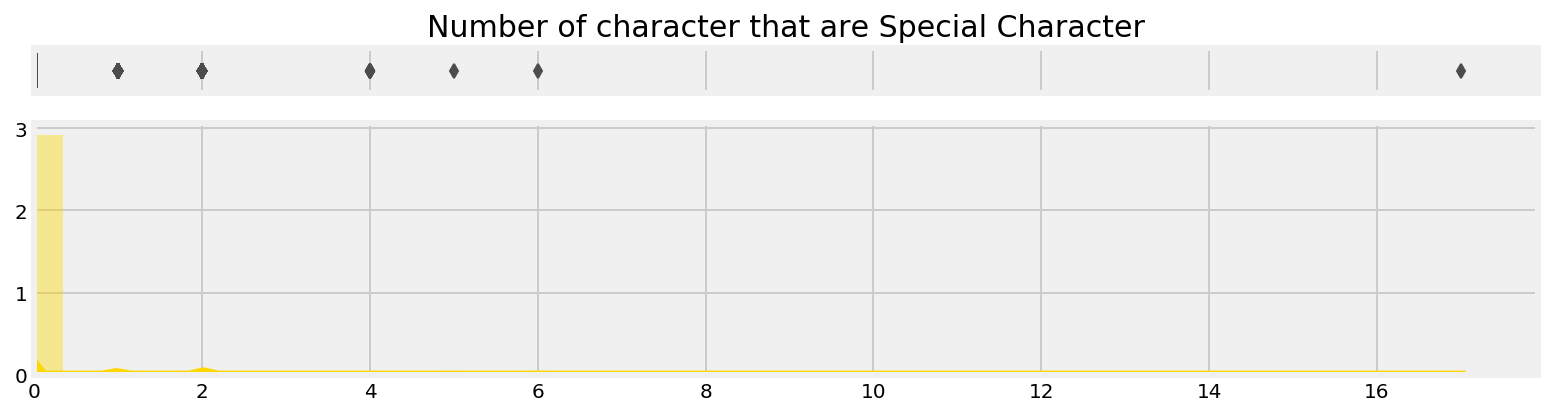


|	Number of texts whose character cataloging didn't happen properly 0 / 39918


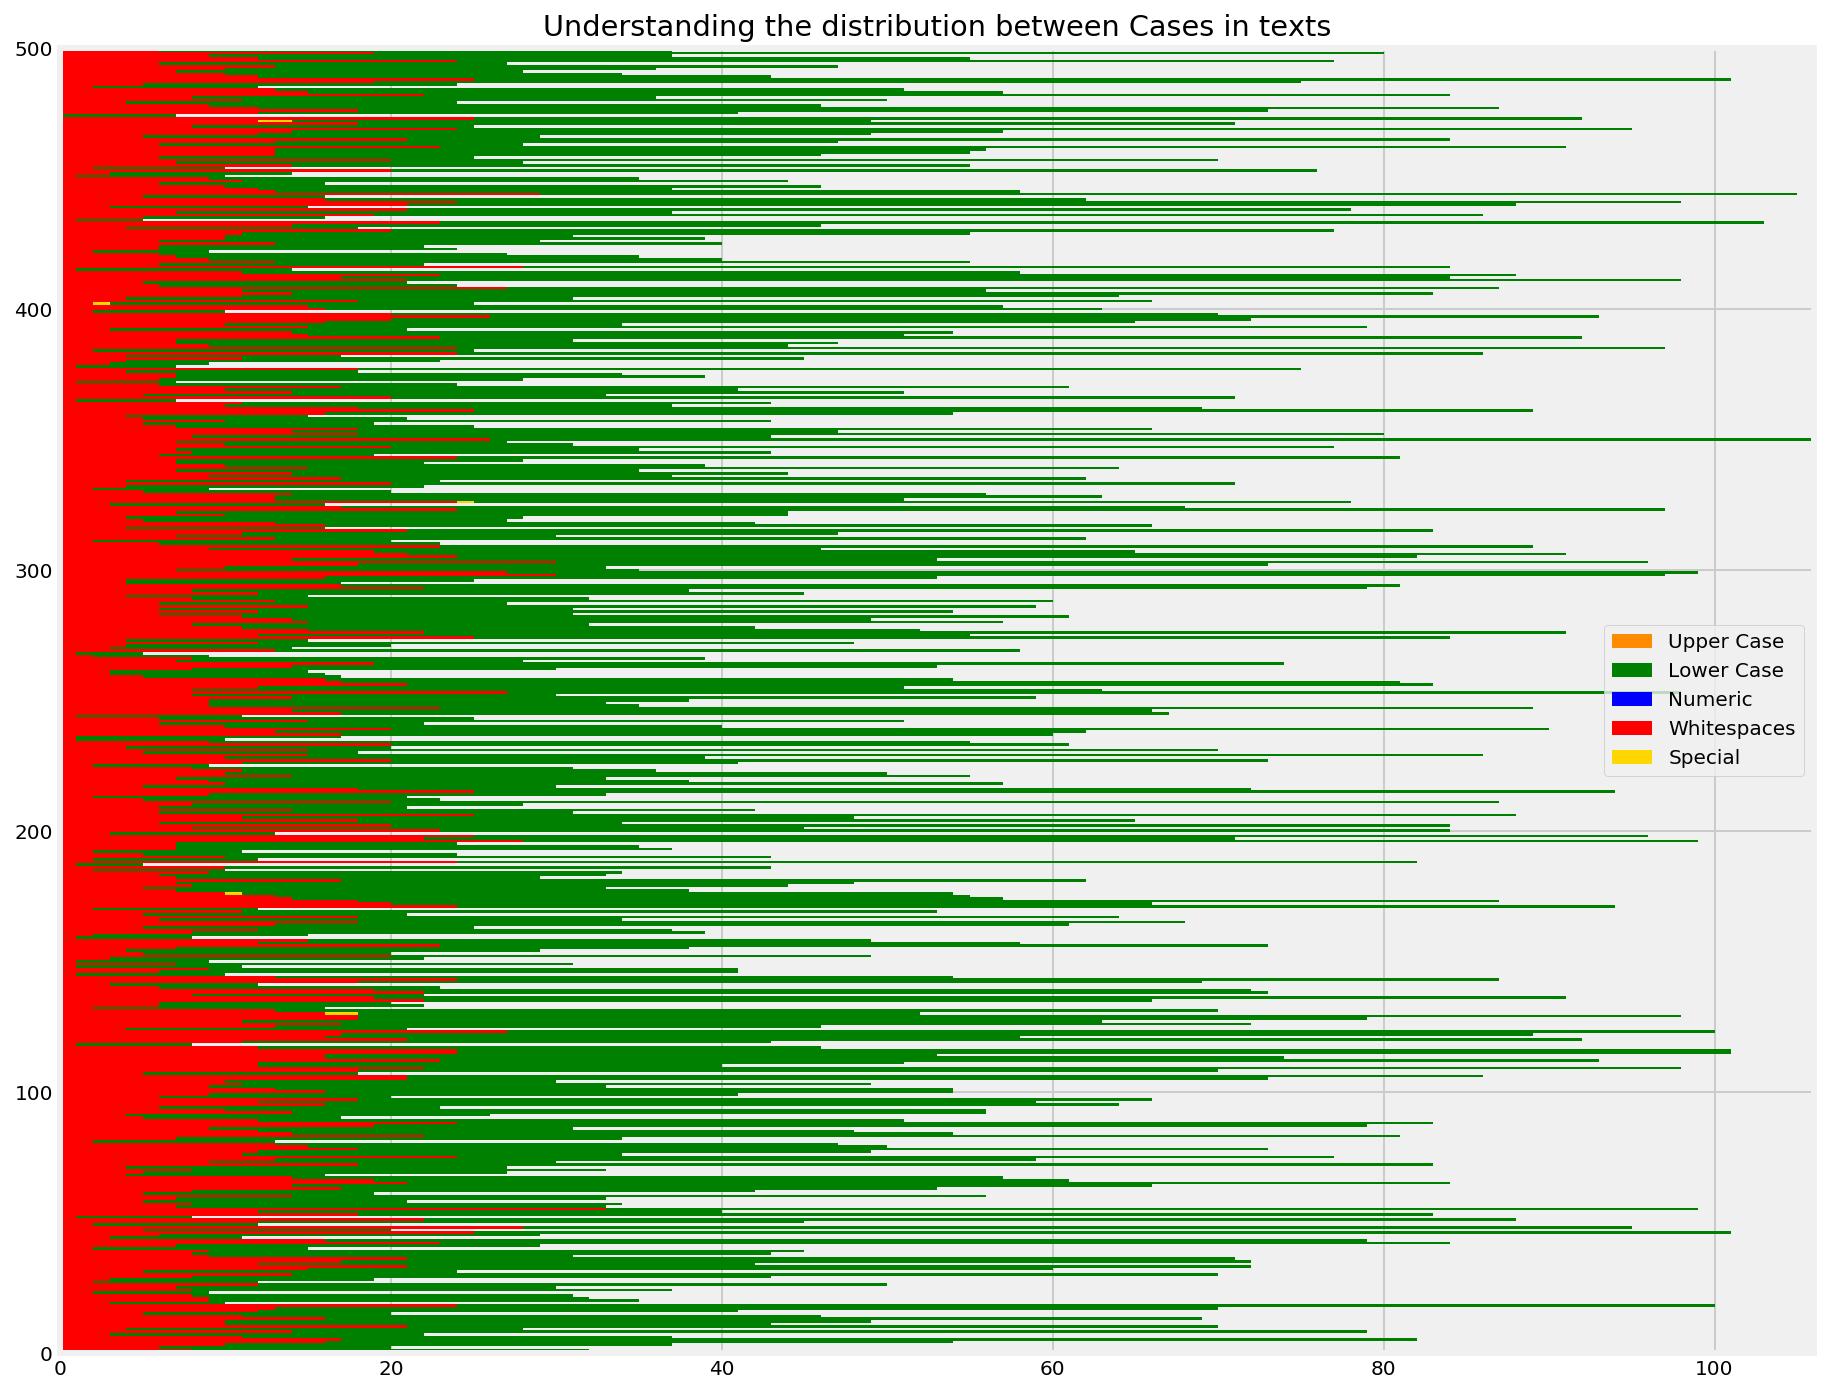

In [7]:
## Plot Character Level Information of the Text
peculiar_cases = plot_chartext_informations(train_DF['text'])
if len(peculiar_cases) > 0: print(train_DF['text'][peculiar_cases])

### Understanding the text at Word Level

Number of Word
Average Word Length
Number of StopWords

Number of Words THat Has Majority(>50%) as Digits
Number of Words having Special Character in Between
Number of Words having Digits in Between
NUmber of Words that have First Character in Upper Case

Number of Sentences in the text i.e. full stops
Average Length of the sentences

Word Frequency Plot
Rare Words PLots / Highlighing


Basic feature extraction using text data
    Number of words
    Number of characters
    Average word length
    Number of stopwords
    Number of special characters
    Number of numerics
    Number of uppercase words

Basic Text Pre-processing of text data
Lower casing
Punctuation removal
Stopwords removal
Frequent words removal
Rare words removal
Spelling correction
Tokenization
Stemming
Lemmatization
Advance Text Processing
N-grams
Term Frequency
Inverse Document Frequency
Term Frequency-Inverse Document Frequency (TF-IDF)
Bag of Words
Sentiment Analysis
Word Embedding

### 5.2. Computing Term Frequency for further Data Visualization

In [8]:
## HashingVectorizer
## CountVectorizer
## TfidfVectorizer

## Initializing the Vectorizer
CntVec = CountVectorizer(
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True, ## Lower case
    preprocessor=None,
    tokenizer=None,
    stop_words=None, ## StopWords
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    #dtype=<class 'numpy.int64'>
)

## Fitting the Model
CntVec.fit(list(train_DF['text']))

## Checking the Number of Words extracted by Count_vectorizer from the corpus
print('# of features/words that are present in the text: {}'.format(len(CntVec.get_feature_names())))
# print('\nSample of how get_feature_names looks like:\n', CntVec.get_feature_names()[0:10])


## Get info on series of texts at Word Level
term_freq_df = cnt_words(CntVec, train_DF['text'], critical_class_arr = train_DF['sentiment_class'], msg=False)
term_freq_df.rename(columns = {'0_class':'Negative_class', '1_class':'Positive_class'}, inplace= True)
display(term_freq_df.head(15))

# of features/words that are present in the text: 27476

Total Words = Stops Words + Other Words
 	27476  =  298  +  27178

A new DataFrame containg term freq has been created and its shape is (27476, 4)


IsStopword  Negative_class  Positive_class  TotalFreq
be          True           13297           11651      24948
to          True            8289            6790      15079
the         True            6464            6746      13210
and         True            4440            4458       8898
not        False            6002            2620       8622
my          True            4563            3100       7663
you         True            2463            5142       7605
it          True            3838            3744       7582
have        True            4147            3062       7209
do          True            3533            2451       5984
in          True            2846            2609       5455
for         True            2488            2860       5348
go          True            2782            2058       4840
of          True            2318            2276       4594
get         True            2370            2002       4372

it looks like count vectorizer has extracted 267001 words out of the corpus

### 5.3. Zipf's Law


Zipf's Law is first presented by French stenographer Jean-Baptiste Estoup and later named after the American linguist George Kingsley Zipf. Zipf's Law states that a small number of words are used all the time, while the vast majority are used very rarely. There is nothing surprising about this, we know that we use some of the words very frequently, such as "the", "of", etc, and we rarely use the words like "aardvark" (aardvark is an animal species native to Africa). However, what's interesting is that "given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc."

In other words, the rth most frequent word has a frequency f(r) that scales according to $${f(r)} \propto \frac{1}{r^\alpha}$$ for $$\alpha \approx {1}$$

Let's see how the tweet tokens and their frequencies look like on a plot.

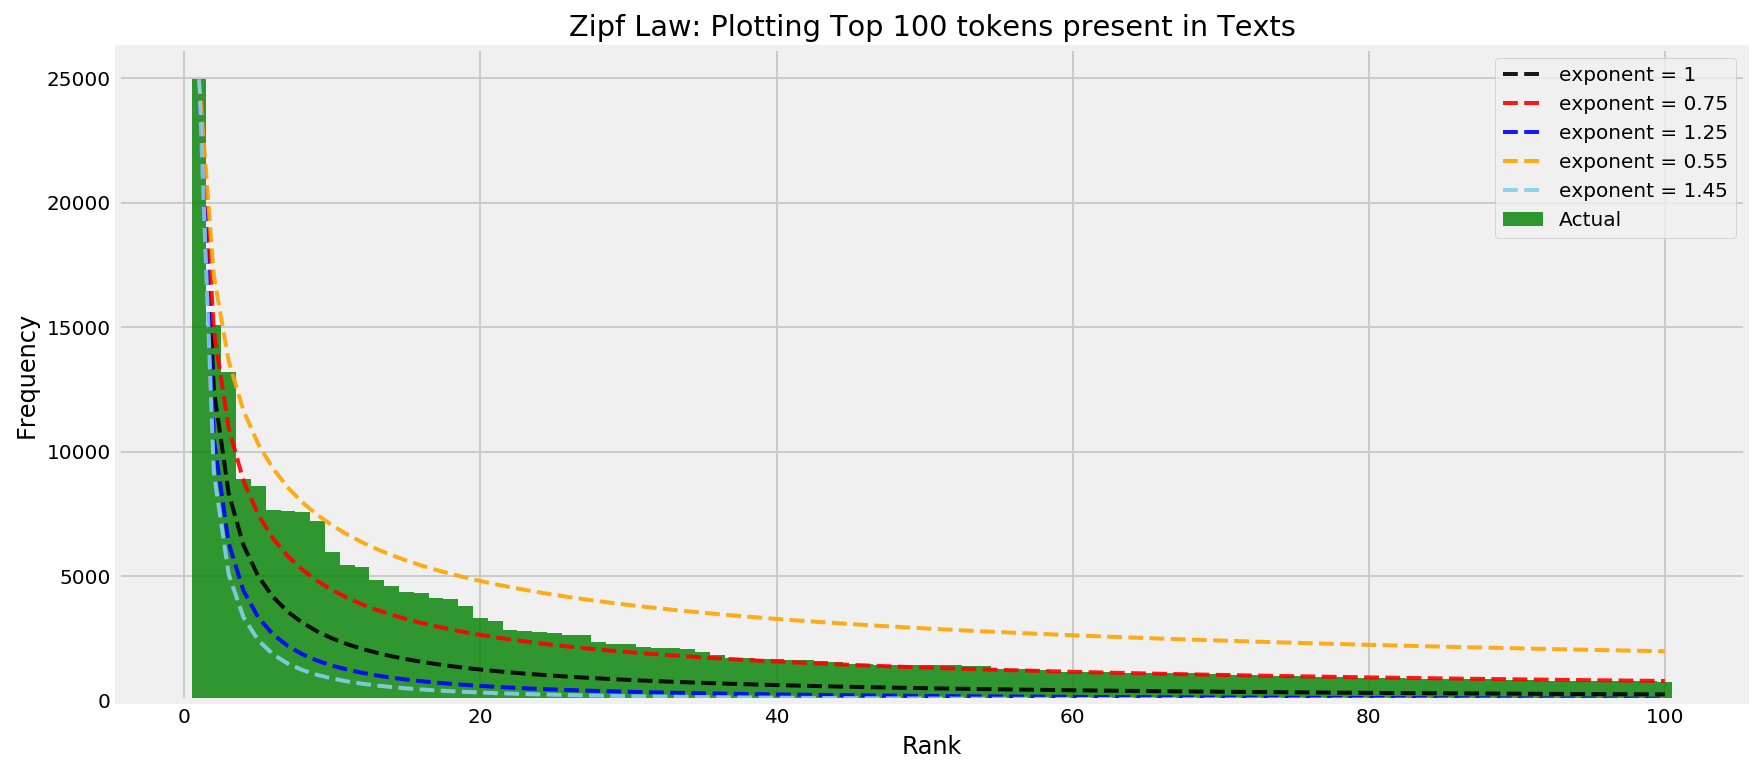

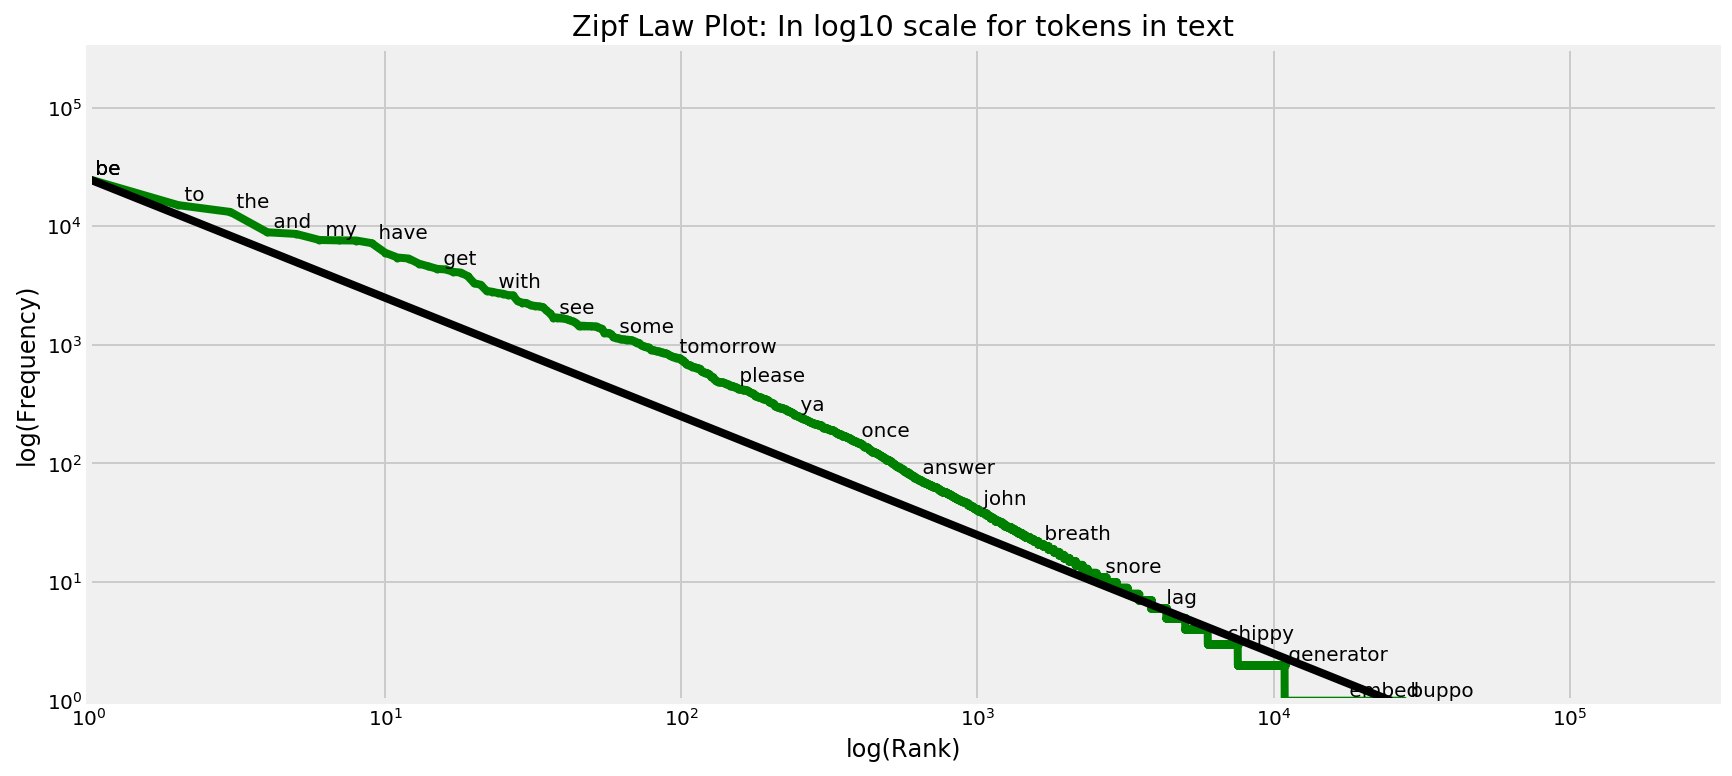

In [9]:
zipf_law_plot(term_freq_df['TotalFreq'], top_ranks_to_view=100)

On the X-axis is the rank of the frequency from highest rank from left up to 500th rank to the right. Y-axis is the frequency observed in the corpus (in this case, "Sentiment140" dataset). One thing to note is that the actual observations in most cases does not strictly follow Zipf's distribution, but rather follow the trend of "near-Zipfian" distribution.

Even though we can see the plot follows the trend of Zipf's Law, but it looks like it has more area above the expected Zipf curve in higher ranked words.

Another way to plot this is on a log-log graph, with X-axis being log(rank), Y-axis being log(frequency). By plotting on the log-log scale the result will yield roughly linear line on the graph.

### 5.4. Tokens Frequency Visualisation

This Time Removing stopwords and limiting the max_features

Testing the result --- Way1

Total Words = Stops Words + Other Words
 	10000  =  14  +  9986

A new DataFrame containg term freq has been created and its shape is (10000, 4)
Shape: (10000, 4)


IsStopword  0_class  1_class  TotalFreq
just         True     1621     1594       3215
good        False      826     1801       2627
day         False     1237     1379       2616
work        False     1467      690       2157
like         True     1087     1045       2132
love        False      510     1331       1841
today       False      968      733       1701
time        False      809      861       1670
think       False      807      730       1537
lol         False      558      894       1452
thank       False      189     1252       1441
know        False      717      717       1434
make        False      696      734       1430
miss        False     1142      237       1379
want        False      968      403       1371

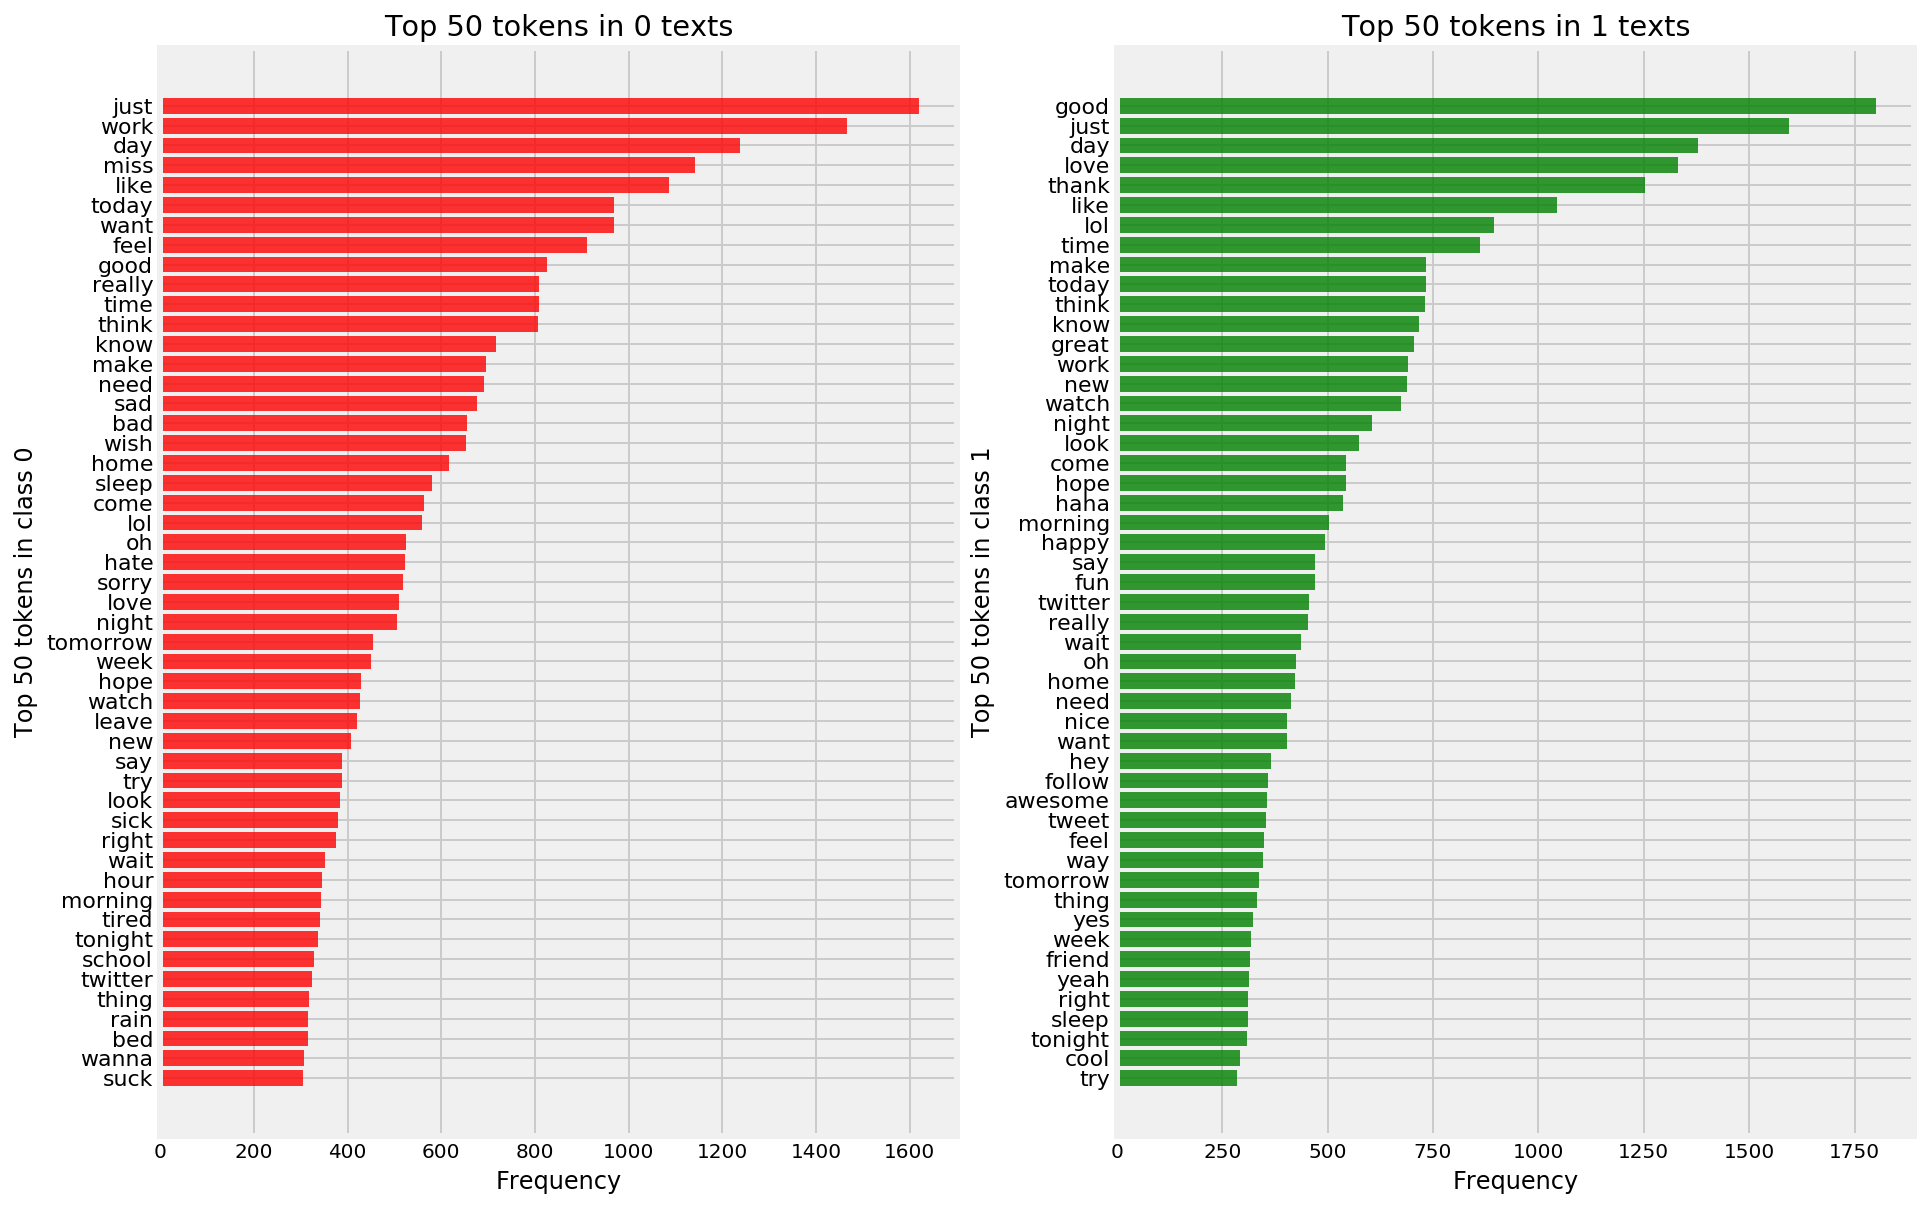

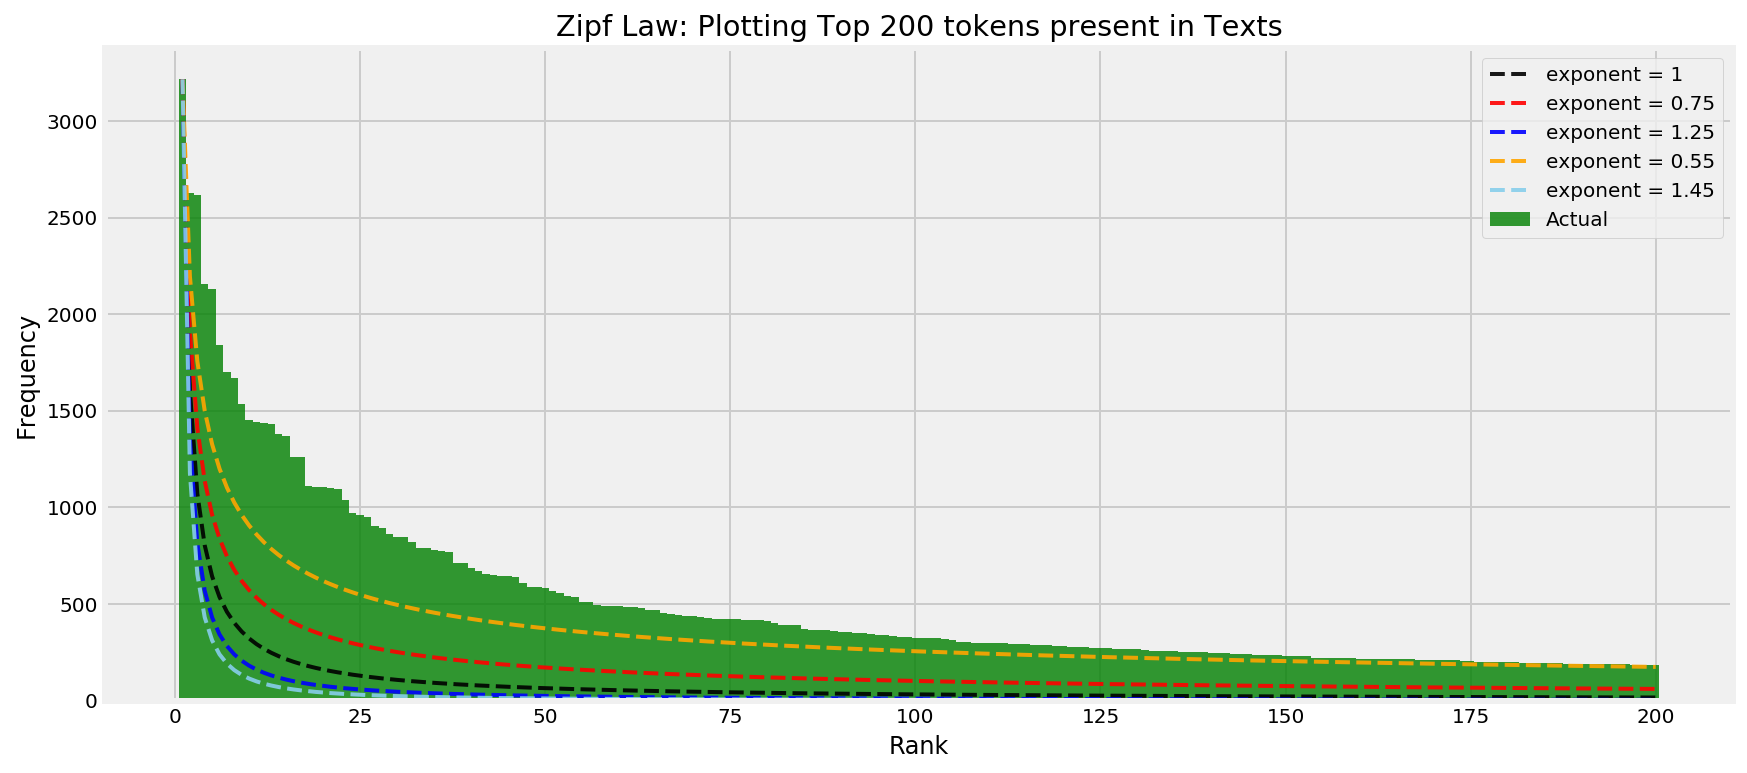

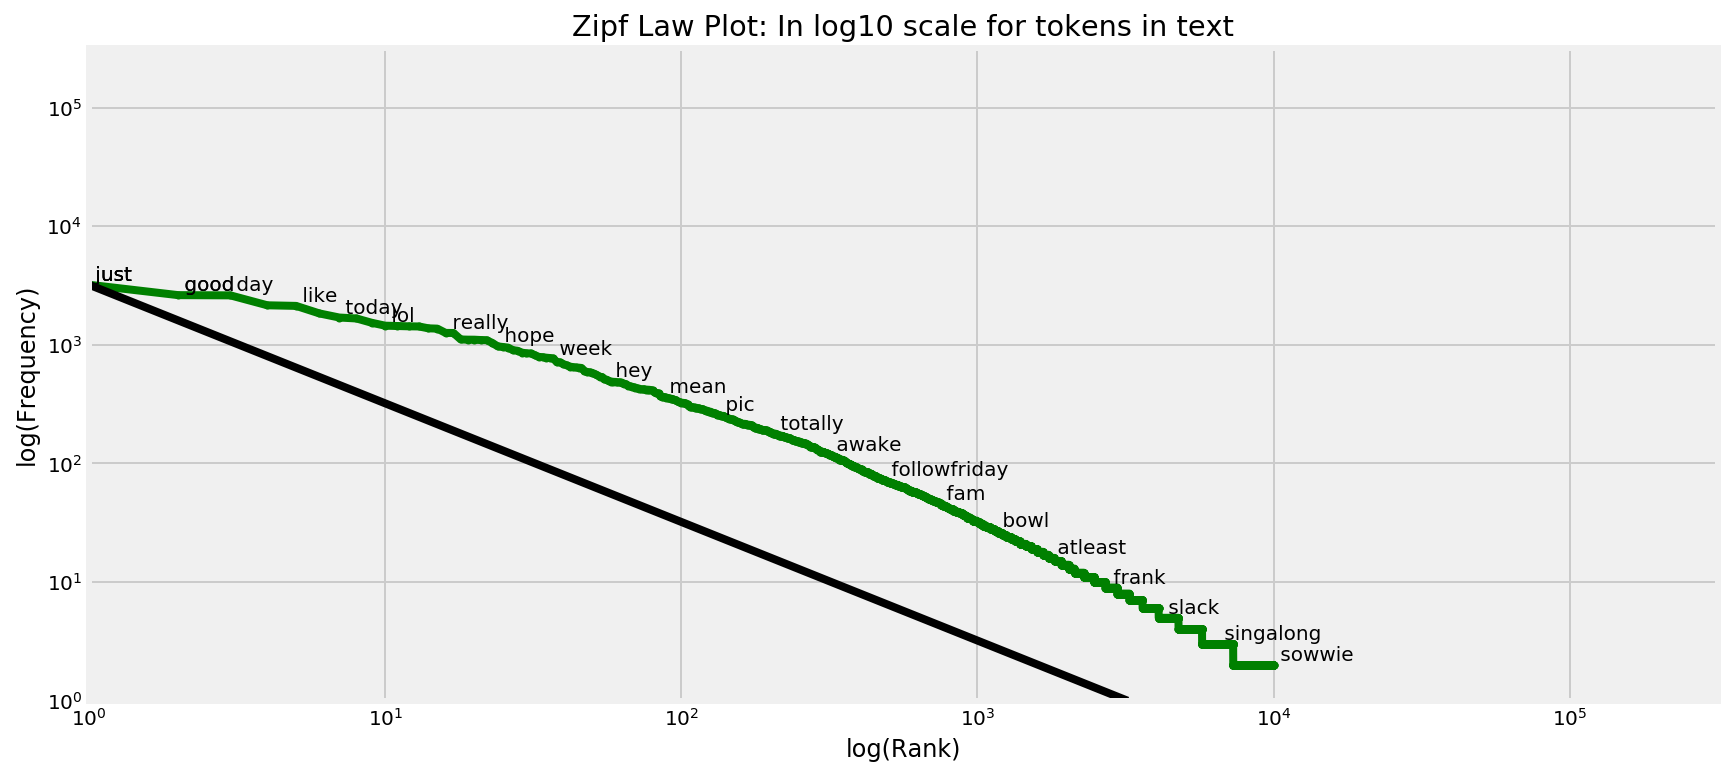

Testing the result --- Way2
Shape: (10000, 4)


IsStopword  Negative_class  Positive_class  TotalFreq
not         False            6002            2620       8622
good        False             826            1801       2627
day         False            1237            1379       2616
work        False            1467             690       2157
no          False            1407             552       1959
love        False             510            1331       1841
today       False             968             733       1701
time        False             809             861       1670
think       False             807             730       1537
lol         False             558             894       1452
thank       False             189            1252       1441
know        False             717             717       1434
make        False             696             734       1430
miss        False            1142             237       1379
want        False             968             403       1371

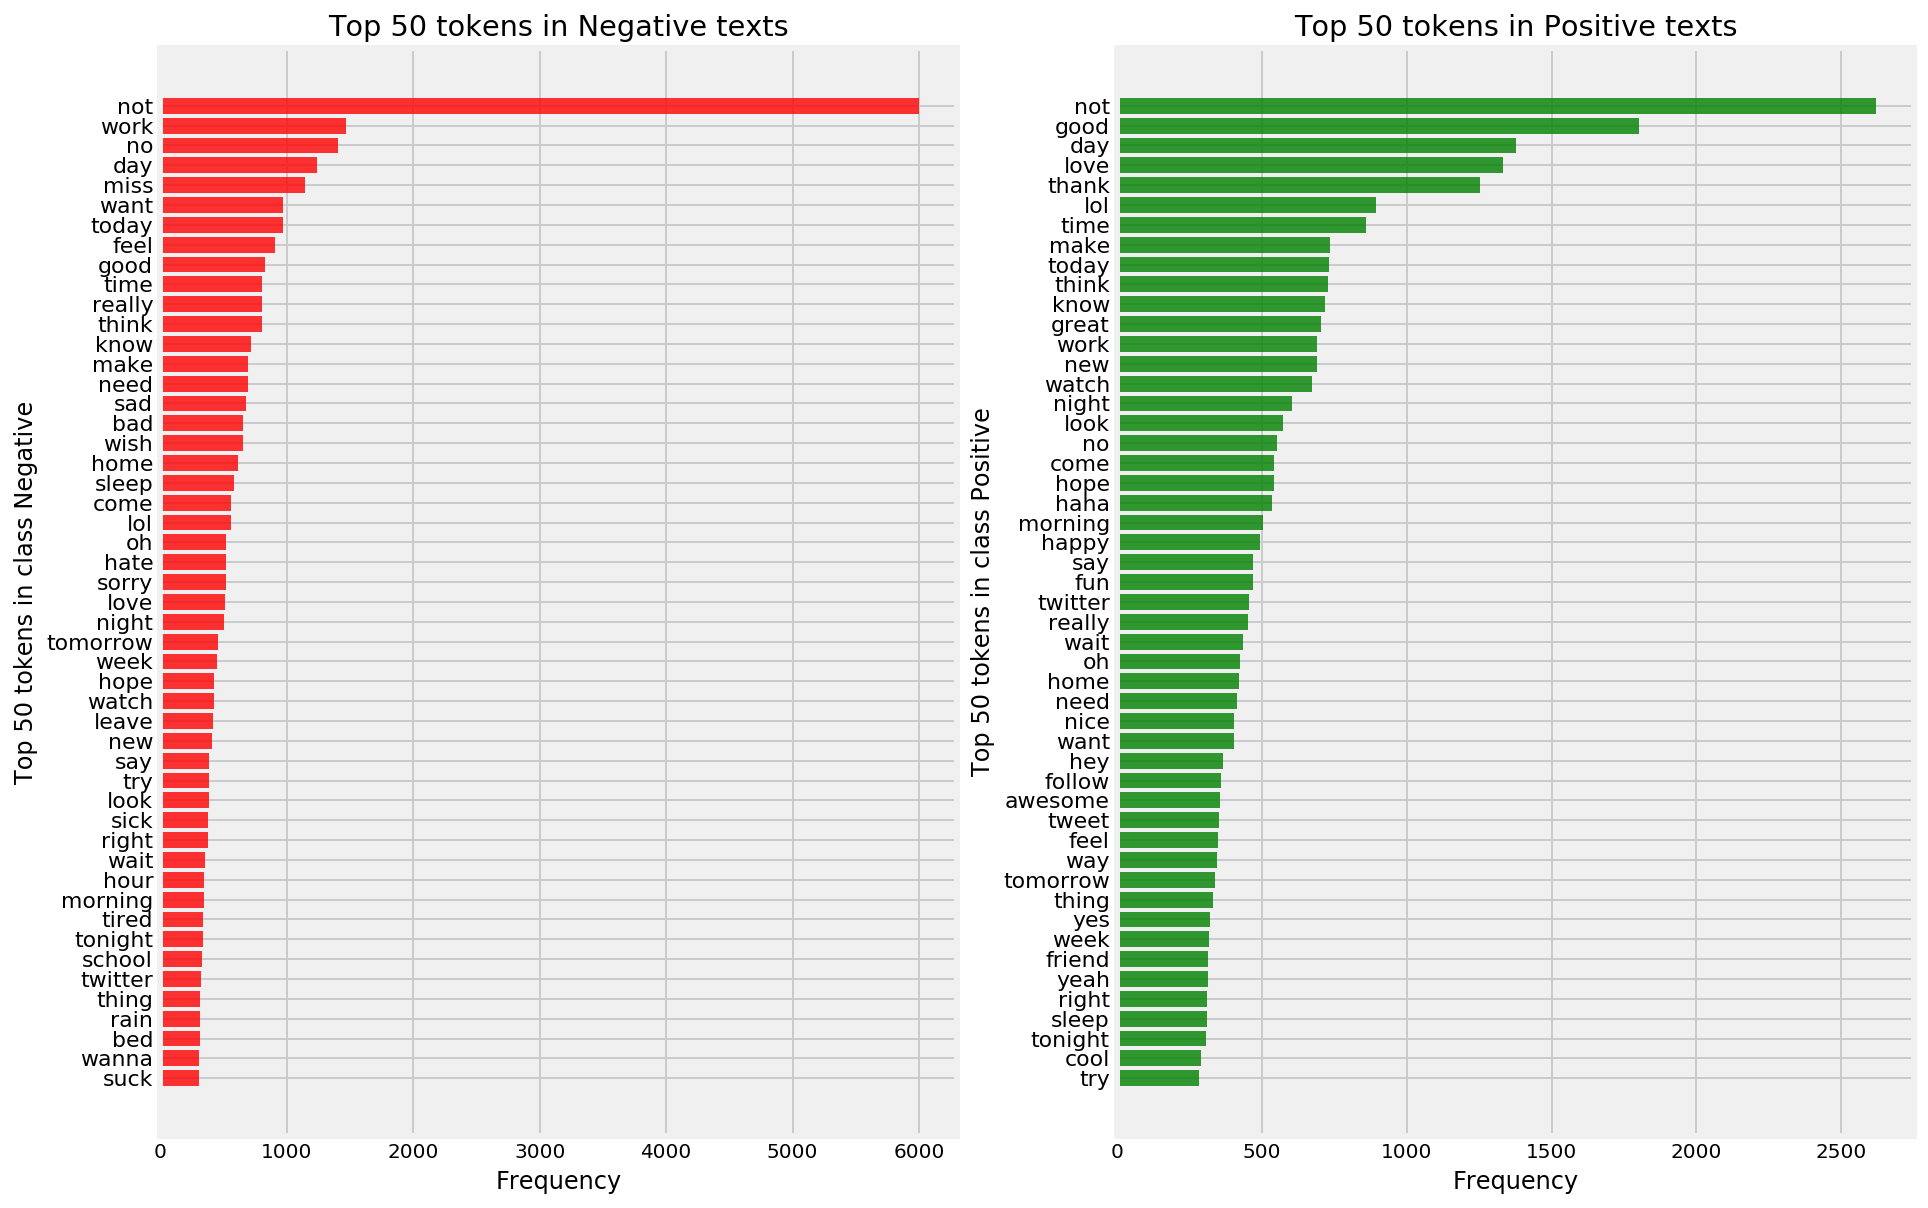

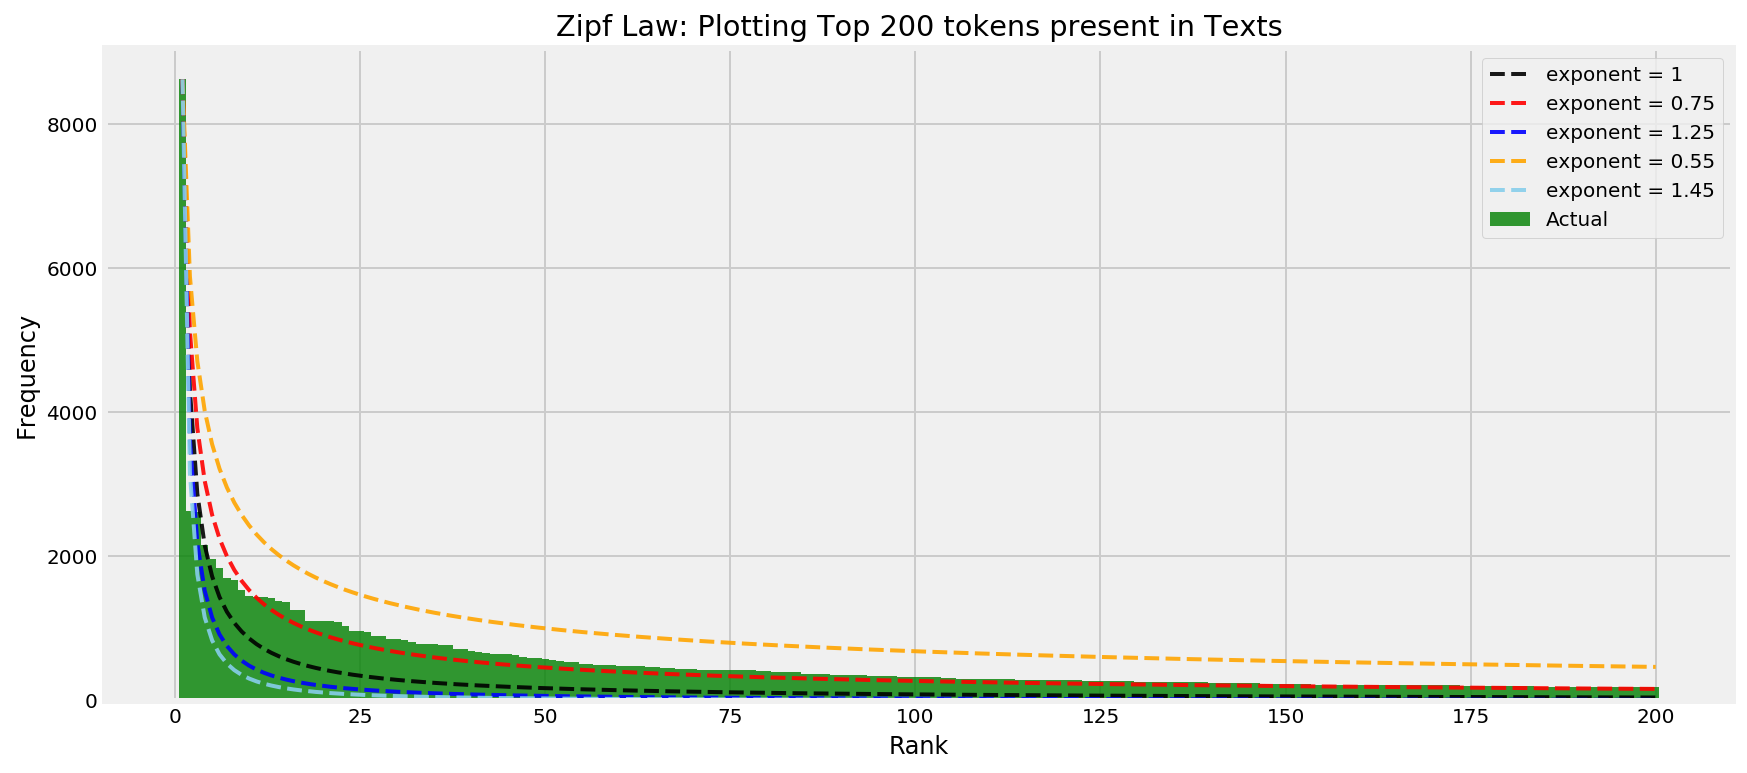

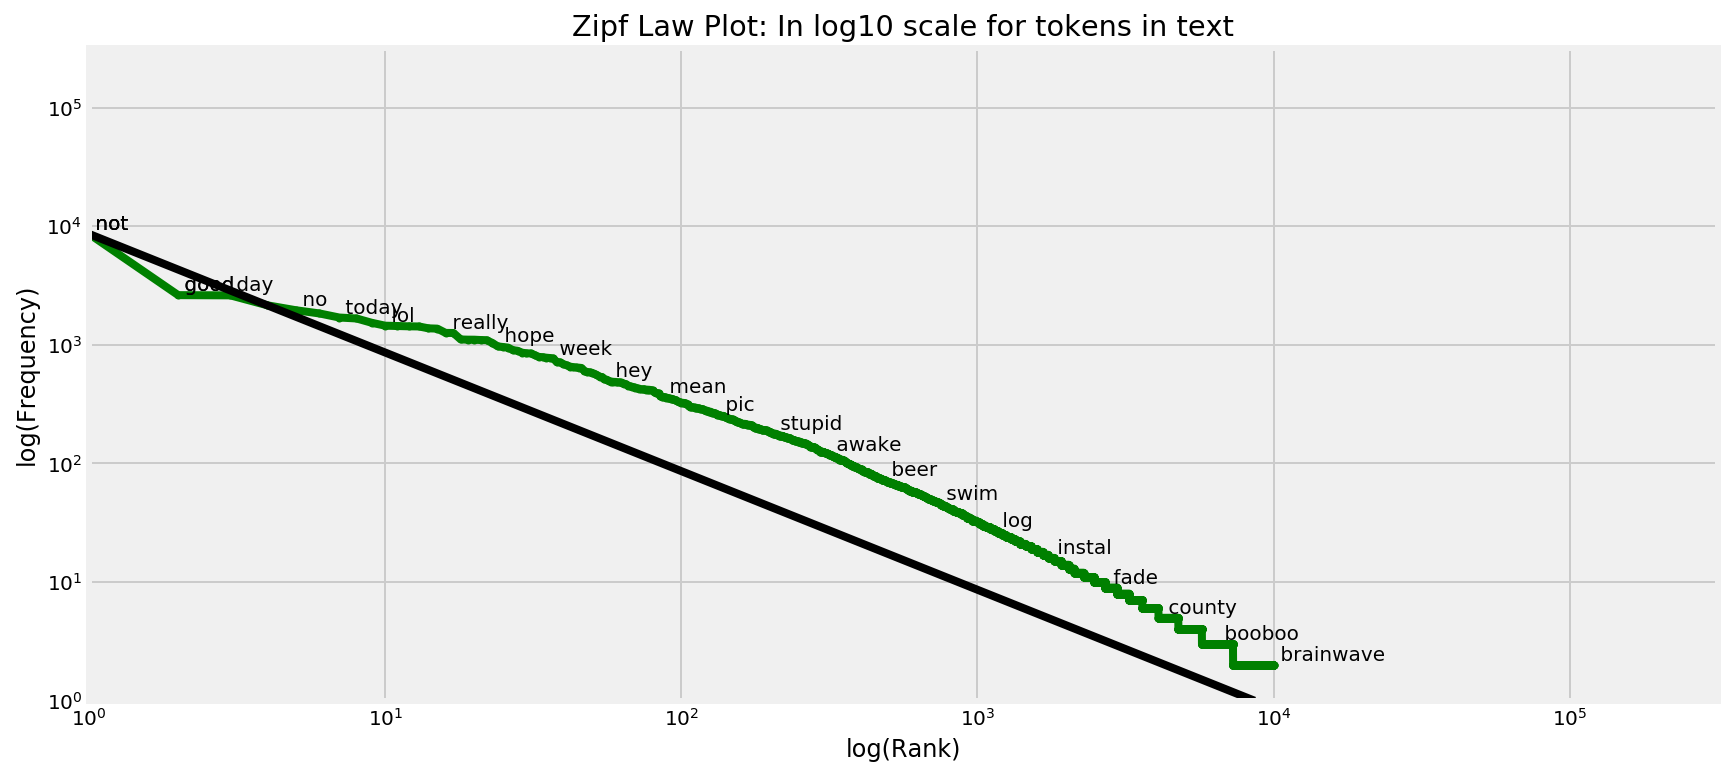

There's a big shift in both the graph mainly because of the stopword consideration as in the way2 "not" and "no" are not considered as Stopword and word such as "just", "like" are also causing the shift in the graph.


In [10]:
## Trying filtering
## Removing the Stopwords and taking top 10,000 features or words
n_features = 10000

## Way1
print('Testing the result --- Way1')
CntVec = CountVectorizer(stop_words='english',max_features=n_features)
CntVec.fit(train_DF['text'])
term_freq_df_sub = cnt_words(CntVec, train_DF['text'], critical_class_arr = train_DF['sentiment_class'], msg=False)
term_freq_df_sub.rename(columns = {0:'Negative_class', 1:'Positive_class'}, inplace= True)
print('Shape:', term_freq_df_sub.shape)
display(term_freq_df_sub.head(15))
visualize_word_count_wrt_class(term_freq_df_sub, top_ranks_to_view=50)
zipf_law_plot(term_freq_df_sub['TotalFreq'], top_ranks_to_view=200)


## Way2
print('Testing the result --- Way2')
sub_term_freq_df = term_freq_df.loc[(term_freq_df['IsStopword']==False), :].loc[ [ i< n_features for i in range(len(term_freq_df))], :]
print('Shape:', sub_term_freq_df.shape)
display(sub_term_freq_df.head(15))
visualize_word_count_wrt_class(sub_term_freq_df, top_ranks_to_view=50)
zipf_law_plot(sub_term_freq_df['TotalFreq'], top_ranks_to_view=200)


print('There\'s a big shift in both the graph mainly because of the stopword consideration as in the way2 "not" and "no" are not considered as Stopword and word such as "just", "like" are also causing the shift in the graph.')

In [ ]:
generate_highlighted_heading('visualize_word_count_wrt_class')

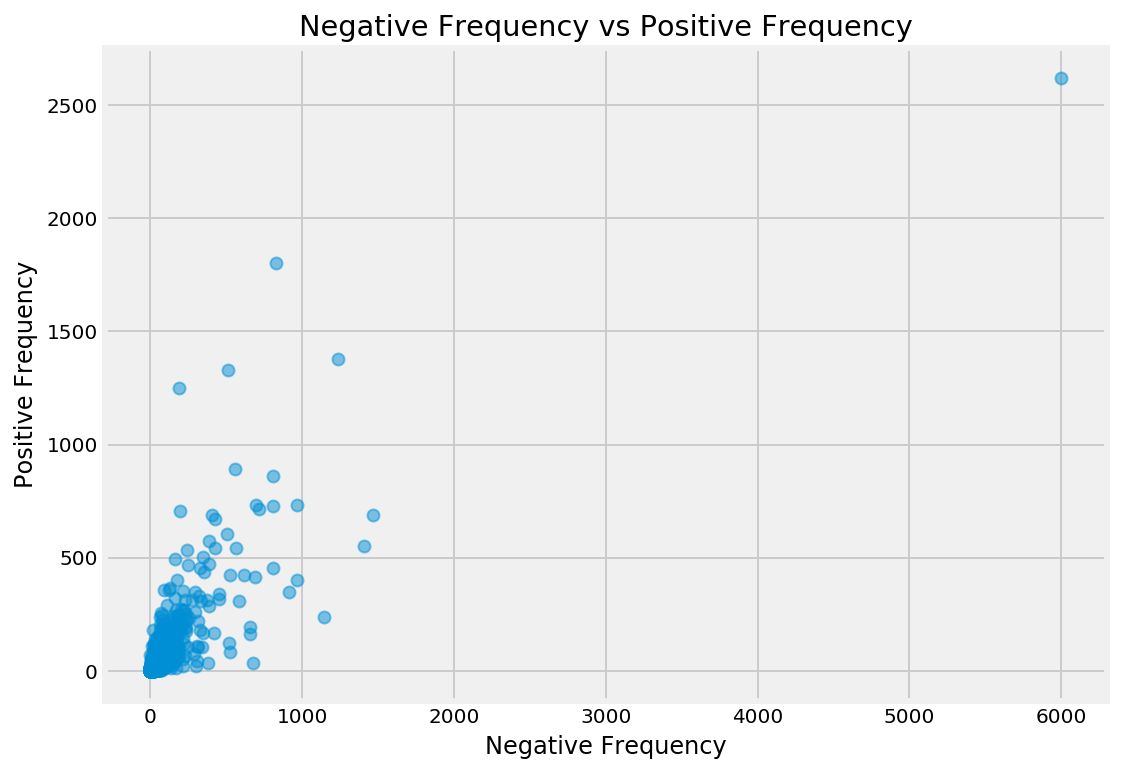

In [11]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="Negative_class", y="Positive_class",fit_reg=False, scatter_kws={'alpha':0.5}, data= sub_term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')
plt.grid(True)
plt.show()

In [12]:

p = figure(x_axis_label='Negative', y_axis_label='Positive', plot_width=650, plot_height=400, x_range=(0, 70000), y_range=(0, 65000))
# p.y_range = Range1d(0, 60000)
linexy = np.arange(max(sub_term_freq_df['Positive_class'])*2) 
p.line(linexy, linexy, line_width=2, color = 'black')
p.circle(x = 'Negative_class',y = 'Positive_class', source= sub_term_freq_df.loc[sub_term_freq_df['Positive_class'] < sub_term_freq_df['Negative_class']], color = 'red', size=5, alpha=0.6)
p.circle(x = 'Negative_class',y = 'Positive_class', source= sub_term_freq_df.loc[sub_term_freq_df['Positive_class'] >= sub_term_freq_df['Negative_class']], color = 'green', size=5, alpha=0.6)


hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Most of the words are below 10,000 on both X-axis and Y-axis, and we cannot see a meaningful relation between negative and positive frequency.

In order to come up with a meaningful metric which can characterise important tokens in each class, I borrowed a metric presented by Jason Kessler in PyData 2017 Seattle. In the talk, he presented a Python library called Scattertext. Even though I did not make use of the library, the metrics used in the Scattertext as a way of visualising text data are very useful in filtering meaningful tokens from the frequency data.

Intuitively, if a word appears more often in one class compared to another, this can be a good measure of how much the word is meaningful to characterise the class. In the below code I named it as 'pos_rate', and as you can see from the calculation of the code, this is defined as $${pos\_rate} = \frac{positive\ frequency} {positive\ frequency + negative\ frequency}$$


Words with highest pos_rate have zero frequency in the negative tweets, but overall frequency of these words are too low to think of it as a guideline for positive tweets.

Another metric is the frequency a words occurs in the class. This is defined as $${pos\_freq\_pct} = \frac {positive\ frequency} {\Sigma positive\ frequency}$$




But since pos_freq_pct is just the frequency scaled over the total sum of the frequency, the rank of pos_freq_pct is exactly same as just the positive frequency.

What we can do now is to combine pos_rate, pos_freq_pct together to come up with a metric which reflects both pos_rate and pos_freq_pct. Even though both of these can take a value ranging from 0 to 1, pos_rate has much wider range actually spanning from 0 to 1, while all the pos_freq_pct values are squashed within the range smaller than 0.015. If we average these two numbers, pos_rate will be too dominant, and will not reflect both metrics effectively.

So here we use harmonic mean instead of arithmetic mean. "Since the harmonic mean of a list of numbers tends strongly toward the least elements of the list, it tends (compared to the arithmetic mean) to mitigate the impact of large outliers and aggravate the impact of small ones." The harmonic mean H of the positive real number x1,x2,...xn is defined as $${H} = \frac {n}{\sum_{i=1}^{n}\ \frac{1}{x_i}}$$



The harmonic mean rank seems like the same as pos_freq_pct. By calculating the harmonic mean, the impact of small value (in this case, pos_freq_pct) is too aggravated and ended up dominating the mean value. This is again exactly same as just the frequency value rank and doesn't provide a meaningful result.

What we can try next is to get the CDF (Cumulative Distribution Function) value of both pos_rate and pos_freq_pct. **CDF can be explained as "distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x".** By calculating CDF value, we can see where the value of either pos_rate or pos_freq_pct lies in the distribution in terms of cumulative manner. In the below result of the code, we can see a word "welcome" with pos_rate_normcdf of 0.995625, and pos_freq_pct_normcdf of 0.999354. This means roughly 99.56% of the tokens will take a pos_rate value less than or equal to 0.91535, and 99.99% will take a pos_freq_pct value less than or equal to 0.001521.

Next, we calculate a harmonic mean of these two CDF values, as we did earlier. By calculating the harmonic mean, we can see that pos_normcdf_hmean metric provides a more meaningful measure of how important a word is within the class.


In [19]:

from scipy.stats import hmean
from scipy.stats import norm

def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

def generate_add_metrics(term_freq_df):
    '''
    Input: Term frequency dataframe generated from "cnt_words" function can be feeded to this
    
    
    To come up with a meaningful metric which can characterise important tokens in each class, 
    a metric presented by Jason Kessler in PyData 2017 Seattle has been borrowed.
    
    $${pos\_rate} = \frac{positive\ frequency} {positive\ frequency + negative\ frequency}$$
    
    $${pos\_freq\_pct} = \frac {positive\ frequency} {\Sigma positive\ frequency}$$
    
    What we can do now is to combine pos_rate, pos_freq_pct together to come up with a metric 
    which reflects both pos_rate and pos_freq_pct. Even though both of these can take a value 
    ranging from 0 to 1, pos_rate has much wider range actually spanning from 0 to 1, while all 
    the pos_freq_pct values are squashed within the range smaller than 0.015. If we average 
    these two numbers, pos_rate will be too dominant, and will not reflect both metrics effectively.
    
    So here we use harmonic mean instead of arithmetic mean. "Since the harmonic mean of a list 
    of numbers tends strongly toward the least elements of the list, it tends (compared to the 
    arithmetic mean) to mitigate the impact of large outliers and aggravate the impact of small 
    ones." The harmonic mean H of the positive real number x1,x2,...xn is defined as 
    $${H} = \frac {n}{\sum_{i=1}^{n}\ \frac{1}{x_i}}$$  
    
    The harmonic mean rank seems like the same as pos_freq_pct. By calculating the harmonic mean, 
    the impact of small value (in this case, pos_freq_pct) is too aggravated and ended up dominating 
    the mean value. This is again exactly same as just the frequency value rank and doesn't provide 
    a meaningful result.
    **CDF can be explained as "distribution function of X, evaluated at x, is the probability that 
    X will take a value less than or equal to x".** By calculating CDF value, we can see where the 
    value of either pos_rate or pos_freq_pct lies in the distribution in terms of cumulative manner.
    
    we calculate a harmonic mean of these two CDF values, as we did earlier. By calculating the 
    harmonic mean, we can see that pos_normcdf_hmean metric provides a more meaningful measure of 
    how important a word is within the class.
    '''
    
    sub_df = term_freq_df.filter(like='_class')
    class_cols = sub_df.columns
    
    for cls_i in range(len(class_cols)):
        class_name = class_cols[cls_i].split('_class')[0]
        cl_r, cl_fp, cl_hm = class_name+'_rate', class_name+'_freq_pct', class_name+'_hmean'
        term_freq_df[cl_r] = term_freq_df[class_cols[cls_i]] * 1./term_freq_df['TotalFreq']
        term_freq_df[cl_fp] = term_freq_df[class_cols[cls_i]] * 1./term_freq_df[class_cols[cls_i]].sum()
        term_freq_df[cl_hm] = term_freq_df.apply(lambda x: (hmean([x[cl_r], x[cl_fp]])
                                                            if x[cl_r] > 0 and x[cl_fp] > 0 
                                                            else 0), axis=1)                                                        
        
        cl_rncdf, cl_fpncdf, cl_ncdfhm = class_name+'_rate_normcdf', class_name+'_freq_pct_normcdf', class_name+'_normcdf_hmean'
        term_freq_df[cl_rncdf] = normcdf(term_freq_df[cl_r])
        term_freq_df[cl_fpncdf] = normcdf(term_freq_df[cl_fp])
        term_freq_df[cl_ncdfhm] = hmean([term_freq_df[cl_rncdf], term_freq_df[cl_fpncdf]])
        
        print('\nSorting according to class_norm_cdf for the class', class_name)
        temp_li=list(term_freq_df.sort_values(by=cl_ncdfhm, ascending=False).head(30).index)
        print('Top 30 words which seems important in this class includes : ', temp_li)
        
    return term_freq_df

term_freq_df_adv = generate_add_metrics(term_freq_df)
term_freq_df_adv.head(15)


Sorting according to class_norm_cdf for the class Negative
Top 30 words which seems important in this class includes :  ['sad', 'sick', 'hurt', 'suck', 'hate', 'miss', 'ugh', 'sorry', 'bad', 'poor', 'lose', 'wish', 'tired', 'cry', 'why', 'damn', 'rain', 'break', 'wanna', 'feel', 'no', 'headache', 'leave', 'want', 'not', 'die', 'stupid', 'bored', 'work', 'happen']

Sorting according to class_norm_cdf for the class Positive
Top 30 words which seems important in this class includes :  ['thank', 'welcome', 'awesome', 'great', 'amazing', 'yay', 'happy', 'song', 'follow', 'hey', 'glad', 'enjoy', 'love', 'smile', 'cool', 'excited', 'nice', 'hello', 'haha', 'check', 'good', 'your', 'music', 'goodnight', 'birthday', 'beautiful', 'cute', 'you', 'hehe', 'yes']


IsStopword  Negative_class  Positive_class  TotalFreq  Negative_rate  Negative_freq_pct  Negative_hmean  Negative_rate_normcdf  Negative_freq_pct_normcdf  Negative_normcdf_hmean  Positive_rate  Positive_freq_pct  Positive_hmean  Positive_rate_normcdf  Positive_freq_pct_normcdf  Positive_normcdf_hmean
be          True           13297           11651      24948       0.532989           0.053852        0.097820               0.549832                        1.0                0.709537       0.467011           0.050458        0.091075               0.450168                        1.0                0.620850
to          True            8289            6790      15079       0.549705           0.033570        0.063275               0.565164                        1.0                0.722179       0.450295           0.029406        0.055206               0.434836                        1.0                0.606112
the         True            6464            6746      13210       0.489326           0.026179        0.049698               0.509489                        1.0                0.675048       0.510674           0.029215        0.055269               0.490511                        1.0                0.658178
and         True            4440            4458       8898       0.498989           0.017982        0.034712               0.518440                        1.0                0.682858       0.501011           0.019306        0.037180               0.481560                        1.0                0.650072
not        False            6002            2620       8622       0.696126           0.024308        0.046975               0.692968                        1.0                0.818643       0.303874           0.011347        0.021876               0.307032                        1.0                0.469816
my          True            4563            3100       7663       0.595459           0.018480        0.035847               0.606567                        1.0                0.755110       0.404541           0.013425        0.025988               0.393433                        1.0                0.564696
you         True            2463            5142       7605       0.323866           0.009975        0.019354               0.359179                        1.0                0.528523       0.676134           0.022269        0.043117               0.640821                        1.0                0.781098
it          True            3838            3744       7582       0.506199           0.015544        0.030161               0.525113                        1.0                0.688622       0.493801           0.016214        0.031398               0.474887                        1.0                0.643964
have        True            4147            3062       7209       0.575253           0.016795        0.032637               0.588402                        1.0                0.740873       0.424747           0.013261        0.025719               0.411598                        1.0                0.583166
do          True            3533            2451       5984       0.590408           0.014308        0.027940               0.602046                        1.0                0.751597       0.409592           0.010615        0.020693               0.397954                        1.0                0.569337
in          True            2846            2609       5455       0.521723           0.011526        0.022554               0.539455                        1.0                0.700839       0.478277           0.011299        0.022076               0.460545                        1.0                0.630648
for         True            2488            2860       5348       0.465221           0.010076        0.019725               0.487148                        1.0                0.655144       0.534779           0.012386        0.024211               0.512852                        1.0                0.677994
go

______________________________________________________________________________________________________________


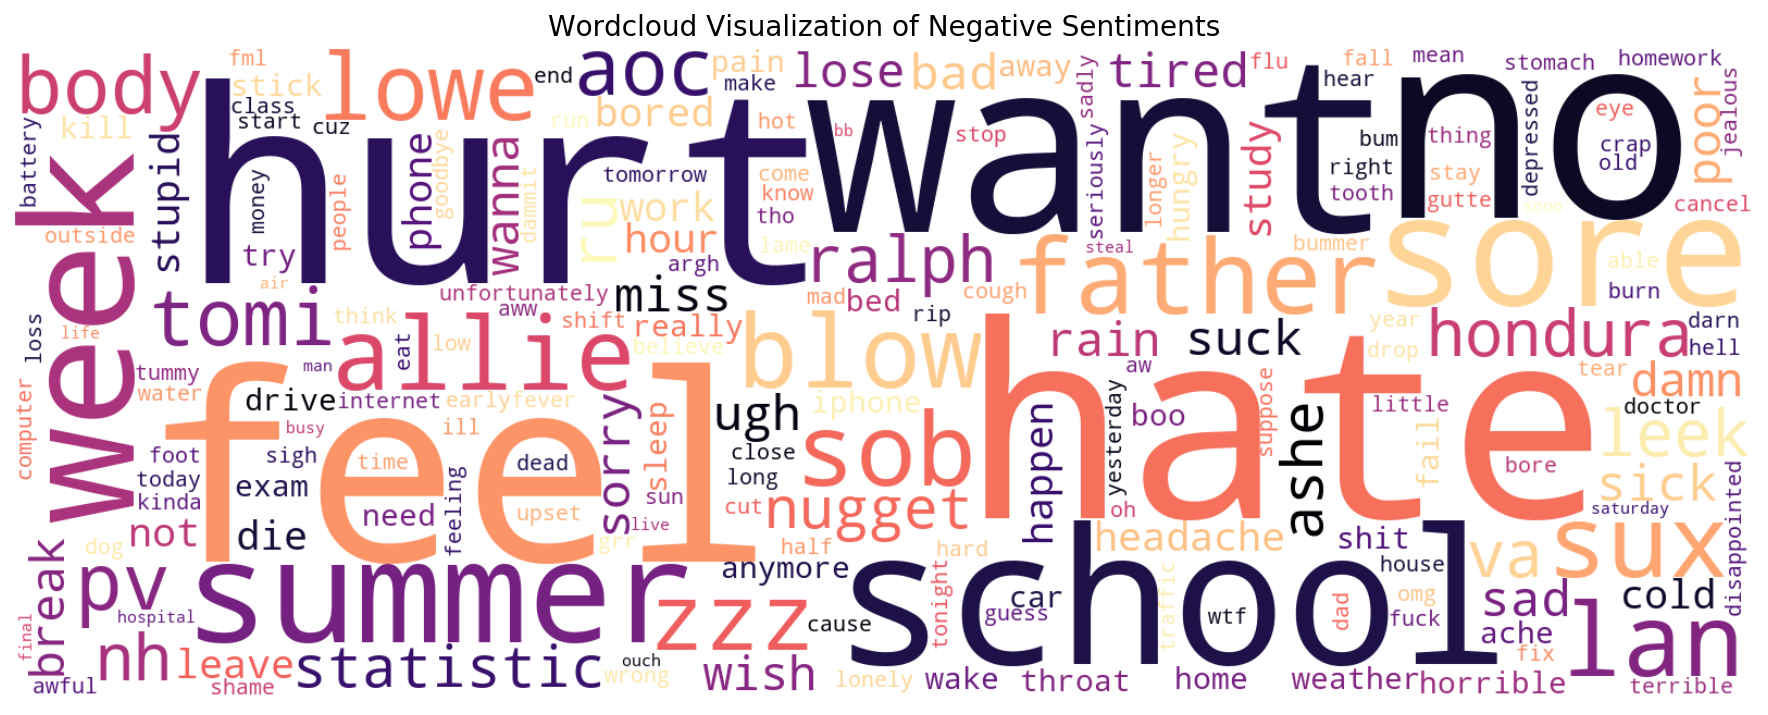

______________________________________________________________________________________________________________


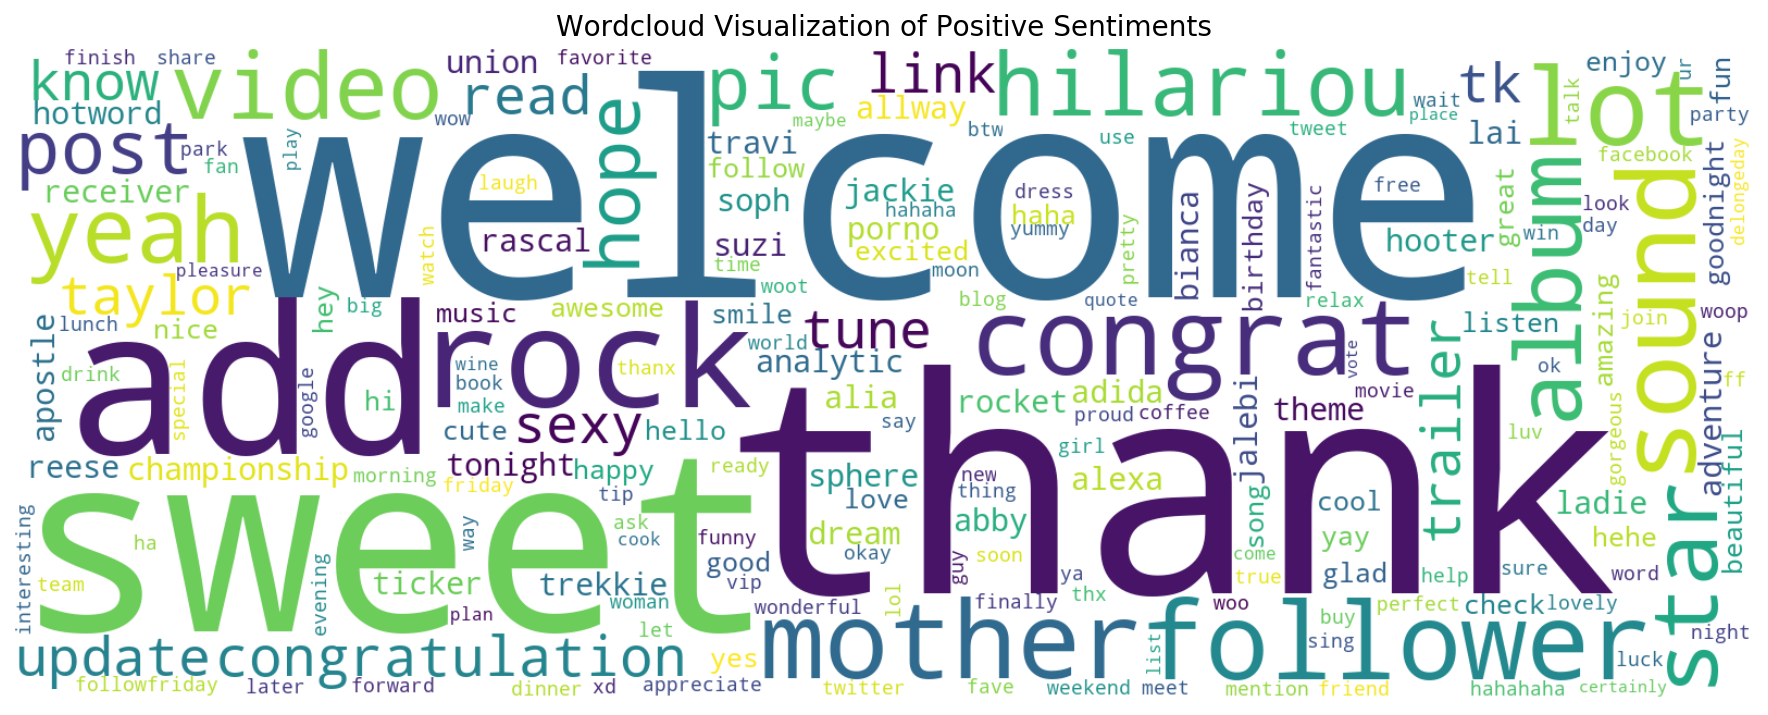

In [20]:
import random

def generate_string_li_for_wrdcloud(term_freq_df_adv, importance_by_feat):
    '''
    '''
    ## getting important Words -- and freq is adjusted using class_normcdf_hmean and 5000 word
    series = temp.sort_values(by=importance_by_feat, ascending=False).head(5000)[importance_by_feat]

    ## giving weightage to each words based on their frequency
    temp_li = []
    [ temp_li.append(series.index[i]) for i in range(len(series)) for j in range(int(series[i]*100)) ] 

    ## Shuffling the list
    random.shuffle(temp_li)
    
    return temp_li

## Plotting new wordcloud based on newly highlighted important words --Negative
temp_li = generate_string_li_for_wrdcloud(term_freq_df_adv, 'Negative_normcdf_hmean')
plot_wordcloud(temp_li, title = 'Wordcloud Visualization of Negative Sentiments', remove_stopword=True, clr_map = 'magma', bg='white')

## Plotting new wordcloud based on newly highlighted important words --Positive
temp_li = generate_string_li_for_wrdcloud(term_freq_df_adv, 'Positive_normcdf_hmean')
plot_wordcloud(temp_li, title = 'Wordcloud Visualization of Positive Sentiments', remove_stopword=True, bg='white')

In [ ]:
sub_term_freq_df['PositiveRate'] = sub_term_freq_df['Positive_class'] * 1./sub_term_freq_df['TotalFreq']
display(sub_term_freq_df.sort_values(by='PositiveRate', ascending=False).head(10))

sub_term_freq_df['PositiveFreq_pct'] = sub_term_freq_df['Positive_class'] * 1./sub_term_freq_df['Positive_class'].sum()
display(sub_term_freq_df.sort_values(by='PositiveFreq_pct', ascending=False).head(10))


sub_term_freq_df['Positive_hmean'] = sub_term_freq_df.apply(lambda x: (hmean([x['PositiveRate'], x['PositiveFreq_pct']])
                                                                   if x['PositiveRate'] > 0 and x['PositiveFreq_pct'] > 0
                                                                   else 0), axis=1)
display(sub_term_freq_df.sort_values(by='Positive_hmean', ascending=False).head(10))

sub_term_freq_df['PositiveRate_normcdf'] = normcdf(sub_term_freq_df['PositiveRate'])
sub_term_freq_df['PositiveFreq_pct_normcdf'] = normcdf(sub_term_freq_df['PositiveFreq_pct'])
sub_term_freq_df['Positive_normcdf_hmean'] = hmean([sub_term_freq_df['PositiveRate_normcdf'], sub_term_freq_df['PositiveFreq_pct_normcdf']])
display(sub_term_freq_df.sort_values(by='Positive_normcdf_hmean', ascending=False).head(10))

In [21]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="Negative_hmean", y="Positive_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=TermFreq_DF2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('Negative_hmean vs Positive_hmean')

NameError: name 'TermFreq_DF2' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
output_notebook()

p = figure(x_axis_label='Negative Rate and Frequency Harmonic Mean', y_axis_label='Positive Rate and Frequency Harmonic Mean', plot_width=650, plot_height=400, x_range=(0, 0.03), y_range=(0, 0.03))

p.line([0,1], [0,1], line_width=2, color = 'black')
p.circle(x = 'Negative_hmean',y = 'Positive_hmean', source= TermFreq_DF2.loc[TermFreq_DF2['Positive_hmean'] < TermFreq_DF2['Negative_hmean']], color = 'red', size=5, alpha=0.6)
p.circle(x = 'Negative_hmean',y = 'Positive_hmean', source= TermFreq_DF2.loc[TermFreq_DF2['Positive_hmean'] >= TermFreq_DF2['Negative_hmean']], color = 'green', size=5, alpha=0.6)

from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)
# from bokeh.plotting import figure
# from bokeh.io import output_notebook, show
# from bokeh.models import LinearColorMapper
# output_notebook()
# color_mapper = LinearColorMapper(palette='Inferno256', low= min(TermFreq_DF2.Positive_hmean), high=max(TermFreq_DF2.Positive_hmean))
# p = figure(x_axis_label='Negative_hmean', y_axis_label='Positive_hmean')
# p.circle('Negative_hmean','Positive_hmean',size=5,alpha=0.3,source= TermFreq_DF2, color={'field': 'Positive_hmean', 'transform': color_mapper})
# from bokeh.models import HoverTool
# hover = HoverTool(tooltips=[('token','@index')])
# p.add_tools(hover)
# show(p)

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="Negative_normcdf_hmean", y="Positive_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=TermFreq_DF2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('Negative_normcdf_hmean vs Positive_normcdf_hmean')

It seems like the harmonic mean of rate CDF and frequency CDF has created an interesting pattern on the plot. If a data point is near to upper left corner, it is more positive, and if it is closer to the bottom right corner, it is more negative.

It is good that the metric has created some meaningful insight out of frequency, but with text data, showing every token as just a dot is lacking important information on which token each data point represents. With 10,000 points, it is difficult to annotate all of the points on the plot. For this part, I have tried several methods and came to a conclusion that it is not very practical or feasible to directly annotate data points on the plot.

So I took an alternative method of the interactive plot with Bokeh. Bokeh is an interactive visualisation library for Python, which creates graphics in style of D3.js. Bokeh can output the result in HTML format or also within the Jupyter Notebook. And below is the plot created with Bokeh.

In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low= min(TermFreq_DF2.Positive_normcdf_hmean), high=max(TermFreq_DF2.Positive_normcdf_hmean))
p = figure(x_axis_label='Negative_normcdf_hmean', y_axis_label='Positive_normcdf_hmean')
p.line([0,1], [0,1], line_width=2, color = 'black')
p.circle('Negative_normcdf_hmean','Positive_normcdf_hmean',size=5,alpha=0.6,source= TermFreq_DF2,color={'field': 'Positive_normcdf_hmean', 'transform': color_mapper})
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)



With above Bokeh plot, you can see what token each data point represents by hovering over the points. For example, the points in the top left corner show tokens like "thank", "welcome", "congrats", etc. And some of the tokens in bottom right corner are "sad", "hurts", "died", "sore", etc. And the colour of each dot is organised in "Inferno256" colour map in Python, so yellow is the most positive, while black is the most negative, and the colour gradually goes from black to purple to orange to yellow, as it goes from negative to positive.

Depending on which model I will use later for classification of positive and negative tweets, this metric can also come in handy.


### 5.2. Lexical dispersion plot
this is the plot of a word vs the offset of the word in the text corpus.

In [ ]:
# import nltk
# nltk.download('gutenberg')
# nltk.download('genesis')
# nltk.download('inaugural')
# nltk.download('nps_chat')
# nltk.download('webtext')
# nltk.download('treebank')
from  nltk.book import text4 as inaugural_speeches

plt.figure(figsize=(16,5))
topics = ['citizens', 'democracy', 'freedom', 'duties', 'America','principle','people', 'Government']
inaugural_speeches.dispersion_plot(topics)

In [ ]:
# pip3 install yellowbrick
from yellowbrick.text import DispersionPlot

# Load the text data
corpus = load_corpus("hobbies")

# Create a list of words from the corpus text
text = [doc.split() for doc in corpus.data]

# Choose words whose occurence in the text will be plotted
target_words = ['Game', 'player', 'score', 'oil', 'Man']

# Create the visualizer and draw the plot
visualizer = DispersionPlot(target_words)
visualizer.fit(text)
visualizer.poof()

### 5.3 Frequency distribution plot
this plot tries to communicate the frequency of the vocabulary in the text.

In [ ]:
import nltk
nltk.download('brown')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
from nltk.corpus import brown
topics = ['government', 'news', 'religion','adventure','hobbies']
for topic in topics:
    # filter out stopwords and punctuation mark and only create array of words
    words = [word for word in brown.words(categories=topic)
            if word.lower() not in stop_words and word.isalpha() ]
    freqdist = nltk.FreqDist(words)
    # print 5 most frequent words
    print(topic,'more :', ' , '.join([ word.lower() for word, count in freqdist.most_common(5)]))
    # print 5 least frequent words
    print(topic,'less :', ' , '.join([ word.lower() for word, count in freqdist.most_common()[-5:]]))


In [ ]:
# get all words for government corpus
corpus_genre = 'government'
words = [word for word in brown.words(categories=corpus_genre) if word.lower() not in stop_words and word.isalpha() ]
freqdist = nltk.FreqDist(words)
plt.figure(figsize=(16,5))
freqdist.plot(50)

In [ ]:
corpus_genre = 'government'
words = [word for word in brown.words(categories=corpus_genre) if word.lower() not in stop_words and word.isalpha() ]


In [ ]:
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(words)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

# vectorizer = CountVectorizer(stop_words='english')
# docs       = vectorizer.fit_transform(corpus.data)
# features   = vectorizer.get_feature_names()
# visualizer = FreqDistVisualizer(features=features)
# visualizer.fit(docs)
# visualizer.poof()

### 5.4 Lexical diversity dispersion plot
lexical diversity lets us what is the percentage of the unique words in the text corpus for example if there are 100 words in the corpus and there are only 20 unique words then lexical diversity is 20/100=0.2. The formula for calculating lexical diversity is as below :

$$Lexical diversity(LD) = Number of unique words / Number of words$$


In [ ]:
def lexical_diversity(text):
    return round(len(set(text)) / len(text),2)

def get_brown_corpus_words(category, include_stop_words=False):
    '''helper method to get word array for a particular category
     of brown corpus which may/may not include the stopwords that can be toggled
     with the include_stop_words flag in the function parameter'''
    if include_stop_words:
        words = [word.lower() for word in brown.words(categories=category) if word.isalpha() ]
    else:
        words = [word.lower() for word in brown.words(categories=category)
                 if word.lower() not in stop_words and word.isalpha() ]
    return words

# calculate and print lexical diversity for each genre of the brown corpus
for genre in brown.categories():
    lex_div_with_stop = lexical_diversity(get_brown_corpus_words(genre, True))
    lex_div = lexical_diversity(get_brown_corpus_words(genre, False))
    print(genre ,lex_div , lex_div_with_stop)

In [ ]:
def lexical_array(corpus_category = 'news', interval=5000):
    words = get_brown_corpus_words(corpus_category)
    prev = 0
    result = []
    for i in range(0,len(words), interval):
        seg_words = words[prev:i]
        if len(seg_words) > 0:
            result.append(lexical_diversity(seg_words))
        prev = i
    return result

plt.figure(figsize=(16,8))
for cat in brown.categories():
    print(cat)
    plot_array = lexical_array(cat)
    plt.plot(np.arange(0,len(plot_array))*5000,plot_array,label=cat)
plt.legend()
plt.xlabel('Word offset')
plt.ylabel('Lexical diversity')
plt.show()

### 5.5. Word length distribution plot
This plot is word length on x-axis vs number of words of that length on the y-axis. This plot helps to visualise the composition of different word length in the text corpus. Below is the code the achieve this

In [ ]:
cfd = nltk.ConditionalFreqDist(
           (genre, len(word))
           for genre in brown.categories()
           for word in get_brown_corpus_words(genre))

plt.figure(figsize=(16,8))
cfd.plot()

### 5.6. N-gram frequency distribution plot
n-grams is the continuous sequences of n words that occur very often for example for n=2 we are looking for 2 words that occur very often together like New York, Butter milk, etc. such pair of words are also called bigram, for n=3 its called trigram and so on. N-gram distribution plot tries to visualise distribution n-grams for different value of n, for this example, we consider n from 1 to 5. In the plot, x-axis has the different value of n and y-axis has the number of time n-gram sequence has occurred. Below is the code to plot the distribution plot.

In [ ]:
from nltk.util import ngrams
plt.figure(figsize=(16,8))
for genre in brown.categories():
    sol = []
    for i in range(1,6):
        count = 0
        fdist = nltk.FreqDist(ngrams(get_brown_corpus_words(genre), i))
        sol.append(len([cnt for ng,cnt in fdist.most_common() if cnt > 1]))
    plt.plot(np.arange(1,6), sol, label=genre)
plt.legend()
plt.show()

In [ ]:
https://www.scikit-yb.org/en/latest/api/text/tsne.html

Text Cleaning
https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html
https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908
https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/
https://machinelearningmastery.com/clean-text-machine-learning-python/




NLP Tools
https://medium.com/microsoftazure/7-amazing-open-source-nlp-tools-to-try-with-notebooks-in-2019-c9eec058d9f1
https://www.kdnuggets.com/2018/07/comparison-top-6-python-nlp-libraries.html
https://sunscrapers.com/blog/6-best-python-natural-language-processing-nlp-libraries/


NLP Datasets
http://norvig.com/ngrams/
https://catalog.ldc.upenn.edu/LDC2006T13
http://guides.library.ucla.edu/text

In [ ]:
### Word Tree

In [ ]:
# pip3 install word-tree
import word_tree

with open('words.lst') as wl:
    wt = word_tree.make_word_tree([w.strip() for w in wl])

word_tree.next_char(wt, 'do')     

In [ ]:
word_tree.make_word_tree(words)

In [ ]:
from ete3 import  ## http://etetoolkit.org/

words = [ "reel", "road", "root", "curd", "curl", "whatever","whenever", "wherever"]

#Creates a empty tree
tree = Tree()
tree.name = ""
# Lets keep tree structure indexed
name2node = {}
# Make sure there are no duplicates
words = set(words)
# Populate tree
for wd in words:
    # If no similar words exist, add it to the base of tree
    target = tree

    # Find relatives in the tree
    for pos in range(len(wd), -1, -1):
        root = wd[:pos]
        if root in name2node:
            target = name2node[root]
            break

    # Add new nodes as necessary
    fullname = root 
    for letter in wd[pos:]:
        fullname += letter 
        new_node = target.add_child(name=letter, dist=1.0)
        name2node[fullname] = new_node

        target = new_node

# Print structure
print(tree.get_ascii())
# You can also use all the visualization machinery from ETE
# (http://packages.python.org/ete2/tutorial/tutorial_drawing.html)
# tree.show()

# # You can find, isolate and operate with a specific node using the index
# wh_node = name2node["whe"]
# print(wh_node.get_ascii())

# # You can rebuild words under a given node
# def recontruct_fullname(node):
#     name = []
#     while node.up:
#         name.append(node.name)
#         node = node.up
#     name = ''.join(reversed(name))
#     return name

# for leaf in wh_node.iter_leaves():
#     print(recontruct_fullname(leaf))

In [ ]:
## http://etetoolkit.org/
from ete3 import Tree, TreeStyle

t = Tree( "((a,b),c);" )
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
circular_style.scale = 20
t.render("mytree.png", w=183, units="mm", tree_style=circular_style)

In [ ]:
# from ete3 import Tree, TreeStyle

## pip3 install ete3
from ete3 import Tree, TreeStyle

## pip3 install PyQt5
import PyQt5

In [ ]:
t = Tree( "((a,b),c);" )
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
circular_style.scale = 20
t.render("mytree.png", w=183, units="mm", tree_style=circular_style)

<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 3 Reached</b><a class="anchor" id="check3"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    var = %who_ls
    ThingsToKeep = ['glob', 'dill', 'np', 'os', 'pd', 'plt', 'sns', 'time', 'WorkspaceBasedCheckPt', 'config', 'ChPt', 'TermFreq_DF', 'TermFreq_DF2', 'test_DF', 'train_DF']
    print("Things that can be removed from workspace")
    print(", ".join([i for i in var if i not in ThingsToKeep]))

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    del(ALLOW_THREADS, Annotation, Arrow, Artist, AutoLocator, Axes, AxisError, BUFSIZE, Button, CLIP, Circle, CntVec, ComplexWarning, ConstantOfProportionality, CountVectorizer, DAILY, DataSource, DateFormatter, DateLocator, DayLocator, ERR_CALL, ERR_DEFAULT, ERR_IGNORE, ERR_LOG, ERR_PRINT, ERR_RAISE, ERR_WARN, Expected_Zipf1, Expected_Zipf2, FLOATING_POINT_SUPPORT, FPE_DIVIDEBYZERO, FPE_INVALID, FPE_OVERFLOW, FPE_UNDERFLOW, FR, False_, Figure, FigureCanvasBase, FixedFormatter, FixedLocator, FormatStrFormatter, Formatter, FuncFormatter, GridSpec, HOURLY, HourLocator, IndexDateFormatter, IndexLocator, Inf, Infinity, LinAlgError, Line2D, LinearLocator, Locator, LogFormatter, LogFormatterExponent, LogFormatterMathtext, LogLocator, MAXDIMS, MAY_SHARE_BOUNDS, MAY_SHARE_EXACT, MINUTELY, MO, MONTHLY, MachAr, MaxNLocator, MinuteLocator, ModuleDeprecationWarning, MonthLocator, MultipleLocator, NAN, NINF, NZERO, NaN, Negative, NegativeDoc_matrix, Negative_tf, Normalize, NullFormatter, NullLocator, PINF, PZERO, PackageLoader, PolarAxes, Polygon, Positive, PositiveDoc_matrix, Positive_tf, RAISE, RRuleLocator, RankWarning, Rectangle, SA, SECONDLY, SHIFT_DIVIDEBYZERO, SHIFT_INVALID, SHIFT_OVERFLOW, SHIFT_UNDERFLOW, SU, ScalarFormatter, ScalarType, SecondLocator, Slider, Subplot, SubplotTool, TH, TU, Text, TextFreq, TickHelper, TooHardError, TopRanksToView, True_, UFUNC_BUFSIZE_DEFAULT, UFUNC_PYVALS_NAME, VisibleDeprecationWarning, WE, WEEKLY, WRAP, WeekdayLocator, Widget, WordRank, YEARLY, YearLocator, absolute, absolute_import, acorr, add, add_docstring, add_newdoc, add_newdoc_ufunc, add_newdocs, alen, all, allclose, alltrue, amap, amax, amin, angle, angle_spectrum, annotate, any, append, apply_along_axis, apply_over_axes, arange, arccos, arccosh, arcsin, arcsinh, arctan, arctan2, arctanh, argmax, argmin, argpartition, argsort, argwhere, around, array, array2string, array_equal, array_equiv, array_repr, array_split, array_str, arrow, asanyarray, asarray, asarray_chkfinite, ascontiguousarray, asfarray, asfortranarray, asmatrix, asscalar, atleast_1d, atleast_2d, atleast_3d, autoscale, autumn, average, axes, axhline, axhspan, axis, axvline, axvspan, bar, barbs, barh, bartlett, base_repr, bench, beta, binary_repr, bincount, binomial, bitwise_and, bitwise_not, bitwise_or, bitwise_xor, bivariate_normal, blackman, block, bmat, bone, bool8, bool_, box, boxplot, broadcast, broadcast_arrays, broadcast_to, broken_barh, busday_count, busday_offset, busdaycalendar, byte, byte_bounds, bytes, bytes0, bytes_, c_, can_cast, cast, cbook, cbrt, cdouble, ceil, center_matrix, cfloat, char, character, chararray, chisquare, choice, cholesky, choose, cla, clabel, clf, clim, clip, clongdouble, clongfloat, close, cm, cohere, colorbar, colormaps, colors, column_stack, common_type, compare_chararrays, complex128, complex256, complex64, complex_, complexfloating, compress, concatenate, cond, conj, conjugate, connect, contour, contourf, convolve, cool, copper, copy, copysign, copyto, corrcoef, correlate, cos, cosh, count_nonzero, counts, cov, cross, csd, csingle, csv2rec, ctypeslib, cumprod, cumproduct, cumsum, cycler, date2num, datestr2num, datetime, datetime64, datetime_as_string, datetime_data, dedent, deg2rad, degrees, delaxes, delete, demean, deprecate, deprecate_with_doc, deprecated, det, detrend, detrend_linear, detrend_mean, detrend_none, diag, diag_indices, diag_indices_from, diagflat, diagonal, diff, digitize, dirichlet, disconnect, disp, dist, dist_point_to_segment, distances_along_curve, divide, division, divmod, docstring, dot, double, drange, draw, draw_all, draw_if_interactive, dsplit, dstack, dtype, dummy, e, ediff1d, eig, eigh, eigvals, eigvalsh, einsum, einsum_path, emath, empty, empty_like, end_time, entropy, epoch2num, equal, errorbar, errstate, euler_gamma, eventplot, exception_to_str, exp, exp2, exp_safe, expand_dims, expm1, exponent1, exponent2, exponential, extract, eye, f, fabs, fastCopyAndTranspose, fft, fft2, fftfreq, fftn, fftpack, fftpack_lite, fftshift, fftsurr, figaspect, figimage, figlegend, fignum_exists, figtext, figure, fill, fill_between, fill_betweenx, fill_diagonal, find, find_common_type, findobj, finfo, fix, flag, flatiter, flatnonzero, flatten, flexible, flip, fliplr, flipud, float128, float16, float32, float64, float_, float_power, floating, floor, floor_divide, fmax, fmin, fmod, format_float_positional, format_float_scientific, format_parser, frange, frequencies, frexp, frombuffer, fromfile, fromfunction, fromiter, frompyfunc, fromregex, fromstring, full, full_like, fv, gamma, gca, gcf, gci, generic, genfromtxt, geometric, geomspace, get, get_array_wrap, get_backend, get_cmap, get_current_fig_manager, get_figlabels, get_fignums, get_include, get_plot_commands, get_printoptions, get_scale_docs, get_scale_names, get_sparse_matrix, get_state, get_xyz_where, getbufsize, geterr, geterrcall, geterrobj, getp, ginput, gradient, gray, greater, greater_equal, grid, griddata, gumbel, half, hamming, hanning, heaviside, helper, hexbin, hfft, hist, hist2d, histogram, histogram2d, histogramdd, hlines, hold, hot, hsplit, hstack, hsv, hypergeometric, hypot, i, i0, identity, ifft, ifft2, ifftn, ifftshift, ihfft, iinfo, imag, imread, imsave, imshow, in1d, index_exp, indices, inexact, inf, inferno, info, infty, inner, insert, inside_poly, install_repl_displayhook, int0, int16, int32, int64, int8, int_, int_asbuffer, intc, integer, interactive, interp, intersect1d, intp, inv, invert, ioff, ion, ipmt, irfft, irfft2, irfftn, irr, is_busday, is_closed_polygon, is_numlike, isclose, iscomplex, iscomplexobj, isfinite, isfortran, ishold, isin, isinf, isinteractive, isnan, isnat, isneginf, isposinf, ispower2, isreal, isrealobj, isscalar, issctype, issubclass_, issubdtype, issubsctype, isvector, iterable, ix_, jet, kaiser, kron, l1norm, l2norm, lapack_lite, laplace, ldexp, left_shift, legend, less, less_equal, lexsort, linalg, linspace, little_endian, load, loads, loadtxt, locator_params, log, log10, log1p, log2, logaddexp, logaddexp2, logical_and, logical_not, logical_or, logical_xor, logistic, loglog, lognormal, logseries, logspace, long, longcomplex, longdouble, longest_contiguous_ones, longest_ones, longfloat, longlong, lookfor, lstsq, ma, mafromtxt, magma, magnitude_spectrum, margins, mask_indices, mat, math, matmul, matplotlib, matrix, matrix_power, matrix_rank, matshow, maximum, maximum_sctype, may_share_memory, mean, median, memmap, meshgrid, mgrid, min_scalar_type, minimum, minorticks_off, minorticks_on, mintypecode, mirr, mlab, mod, modf, movavg, moveaxis, mpl, msort, multi_dot, multinomial, multiply, multivariate_normal, mx2num, n, nan, nan_to_num, nanargmax, nanargmin, nancumprod, nancumsum, nanmax, nanmean, nanmedian, nanmin, nanpercentile, nanprod, nanstd, nansum, nanvar, nbytes, ndarray, ndenumerate, ndfromtxt, ndim, ndindex, nditer, negative, negative_binomial, nested_iters, new_figure_manager, newaxis, nextafter, nipy_spectral, noncentral_chisquare, noncentral_f, nonzero, norm, norm_flat, normal, normpdf, not_equal, nper, npv, num2date, num2epoch, number, obj2sctype, object0, object_, ogrid, ones, ones_like, outer, over, packbits, pad, pareto, partition, path_length, pause, pcolor, pcolormesh, percentile, permutation, phase_spectrum, pi, pie, piecewise, pink, pinv, pkgload, place, plasma, plot, plot_date, plotfile, plotting, pmt, poisson, polar, poly, poly1d, poly_below, poly_between, polyadd, polyder, polydiv, polyfit, polyint, polymul, polysub, polyval, positive, power, ppmt, prctile, prctile_rank, print_function, prism, prod, product, promote_types, psd, ptp, put, putmask, pv, pylab_setup, qr, quiver, quiverkey, r_, rad2deg, radians, rand, randint, randn, random, random_integers, random_sample, ranf, rank, ranks, rate, ravel, ravel_multi_index, rayleigh, rc, rcParams, rcParamsDefault, rc_context, rcdefaults, real, real_if_close, rec, rec2csv, rec_append_fields, rec_drop_fields, rec_join, recarray, recfromcsv, recfromtxt, reciprocal, record, register_cmap, relativedelta, remainder, repeat, require, reshape, resize, result_type, rfft, rfft2, rfftfreq, rfftn, rgrids, right_shift, rint, rk4, rms_flat, roll, rollaxis, roots, rot90, round_, row_stack, rrule, s_, safe_eval, sample, save, savefig, savetxt, savez, savez_compressed, sca, scatter, sci, sctype2char, sctypeDict, sctypeNA, sctypes, searchsorted, seed, segments_intersect, select, semilogx, semilogy, set_cmap, set_numeric_ops, set_printoptions, set_state, set_string_function, setbufsize, setdiff1d, seterr, seterrcall, seterrobj, setp, setxor1d, shape, shares_memory, short, show, show_config, shuffle, sign, signbit, signedinteger, silent_list, sin, sinc, single, singlecomplex, sinh, six, size, slogdet, slopes, solve, sometrue, sort, sort_complex, source, spacing, specgram, spectral, split, spring, spy, sqrt, square, squeeze, stack, stackplot, standard_cauchy, standard_exponential, standard_gamma, standard_normal, standard_t, start_time, std, stem, step, stineman_interp, str0, str_, streamplot, string_, strpdate2num, style, subplot, subplot2grid, subplot_tool, subplots, subplots_adjust, subtract, sum, summer, suptitle, svd, swapaxes, switch_backend, sys, table, take, tan, tanh, tensordot, tensorinv, tensorsolve, test, text, thetagrids, tick_params, ticklabel_format, tight_layout, tile, timedelta64, title, tokens, trace, tracemalloc_domain, transpose, trapz, tri, triangular, tricontour, tricontourf, tril, tril_indices, tril_indices_from, trim_zeros, tripcolor, triplot, triu, triu_indices, triu_indices_from, true_divide, trunc, twinx, twiny, typeDict, typeNA, typecodes, typename, types, ubyte, ufunc, uint, uint0, uint16, uint32, uint64, uint8, uintc, uintp, ulonglong, unicode, unicode_, unicode_literals, uniform, uninstall_repl_displayhook, union1d, unique, unpackbits, unravel_index, unsignedinteger, unwrap, ushort, vander, var, vdot, vector_lengths, vectorize, violinplot, viridis, vlines, void, void0, vonmises, vsplit, vstack, waitforbuttonpress, wald, warnings, weibull, where, who, window_hanning, window_none, winter, xcorr, xkcd, xlabel, xlim, xscale, xticks, ylabel, ylim, yscale, yticks, zeros, zeros_like, zipf)

In [ ]:
# %reset
# ChPt = 3

In [ ]:
## Nope, It is because of the above cell/code used in plotting the above plot
WorkspaceBasedCheckPt(ChPt, True)
ChPt = 4

In [ ]:
## https://github.com/uqfoundation/dill/issues/155
## https://github.com/uqfoundation/dill/issues/79
## dill.dump

# dill.detect.trace(True)
# try:
# #     WorkspaceBasedCheckPt(2, True)
#     WorkspaceBasedCheckPt(2, True, {'access': True, 'task':'load'})
# except:
#     print(e.message)


# %who, %reset_selective regex, %tb, %who_ls
# print("As after checkpoint 2 we haven't transformed data in anyway hence maintaining this new workspace will be a waste of memory. To have just the essential data we are gonna reset our environment and gonna load checkpoint2 workspace.")
# %reset
# WorkspaceBasedCheckPt(2, True, {'access':True, 'task': 'load'})

In [ ]:
%whos